In [1]:
library(Seurat)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
install.packages("openxlsx")
install.packages("dplyr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(openxlsx)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
readRDS(file = "/data2/ZenNa/DFU_Project/Result/Human_cca.merged.obj.rds")


An object of class Seurat 
24114 features across 29319 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

In [5]:
merged_data <- readRDS(file = "/data2/ZenNa/DFU_Project/Result/Human_cca.merged.obj.rds")


In [6]:
head(merged_data) 

orig.ident             nCount_RNA nFeature_RNA percent.mt
AAACCTGAGGCAGGTT_1 GSM5050523_DFU- healer 2224       1016         4.181655  
AAACCTGAGGGAACGG_1 GSM5050523_DFU- healer 3218       1460         5.189559  
AAACCTGAGGTGATTA_1 GSM5050523_DFU- healer 1785        966         4.537815  
AAACCTGAGTTAACGA_1 GSM5050523_DFU- healer 2545       1367         3.536346  
AAACCTGCATGTTGAC_1 GSM5050523_DFU- healer 2019        972         4.061417  
AAACCTGGTGACTCAT_1 GSM5050523_DFU- healer 3253       1342         2.981863  
AAACCTGGTTCAGTAC_1 GSM5050523_DFU- healer 3456       1080         3.559028  
AAACCTGTCCGCATAA_1 GSM5050523_DFU- healer 6744       2205         3.825623  
AAACCTGTCGGAAACG_1 GSM5050523_DFU- healer 3763       1510         2.870050  
AAACCTGTCGGAAATA_1 GSM5050523_DFU- healer 2294        996         4.795118  
                   sample      integrated_snn_res.0.2 seurat_clusters
AAACCTGAGGCAGGTT_1 DFU- healer 0                      0              
AAACCTGAGGGAACGG_1 DFU- healer 4                      4              
AAACCTGAGGTGATTA_1 DFU- healer 1                      1              
AAACCTGAGTTAACGA_1 DFU- healer 0                      0              
AAACCTGCATGTTGAC_1 DFU- healer 1                      1              
AAACCTGGTGACTCAT_1 DFU- healer 0                      0              
AAACCTGGTTCAGTAC_1 DFU- healer 5                      5              
AAACCTGTCCGCATAA_1 DFU- healer 1                      1              
AAACCTGTCGGAAACG_1 DFU- healer 1                      1              
AAACCTGTCGGAAATA_1 DFU- healer 4                      4              
                   major_group
AAACCTGAGGCAGGTT_1 DFU- healer
AAACCTGAGGGAACGG_1 DFU- healer
AAACCTGAGGTGATTA_1 DFU- healer
AAACCTGAGTTAACGA_1 DFU- healer
AAACCTGCATGTTGAC_1 DFU- healer
AAACCTGGTGACTCAT_1 DFU- healer
AAACCTGGTTCAGTAC_1 DFU- healer
AAACCTGTCCGCATAA_1 DFU- healer
AAACCTGTCGGAAACG_1 DFU- healer
AAACCTGTCGGAAATA_1 DFU- healer

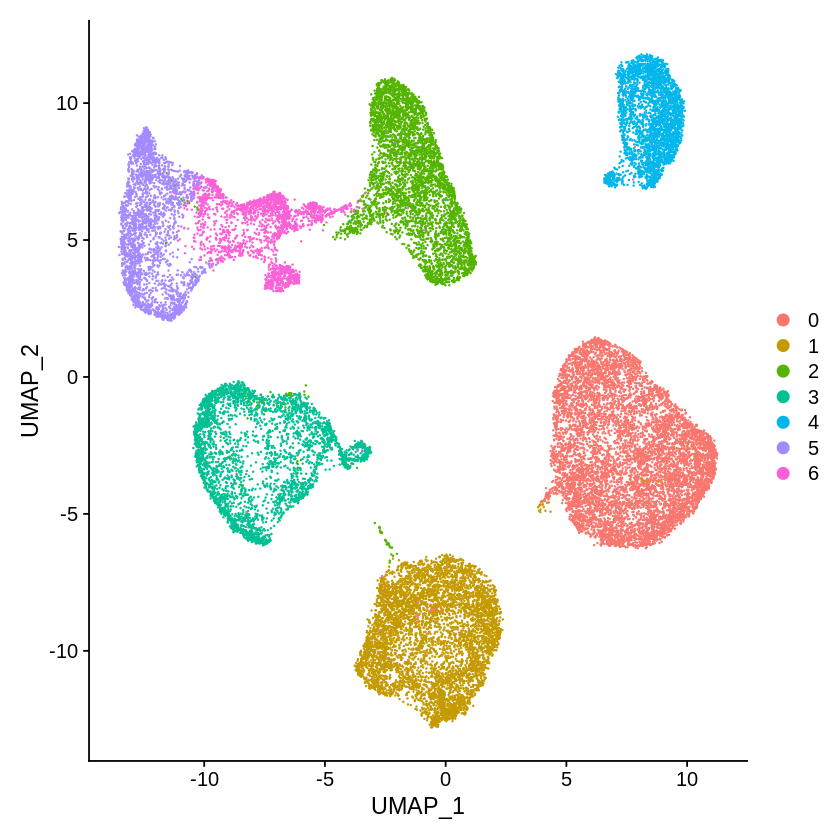

In [7]:
DimPlot(merged_data)

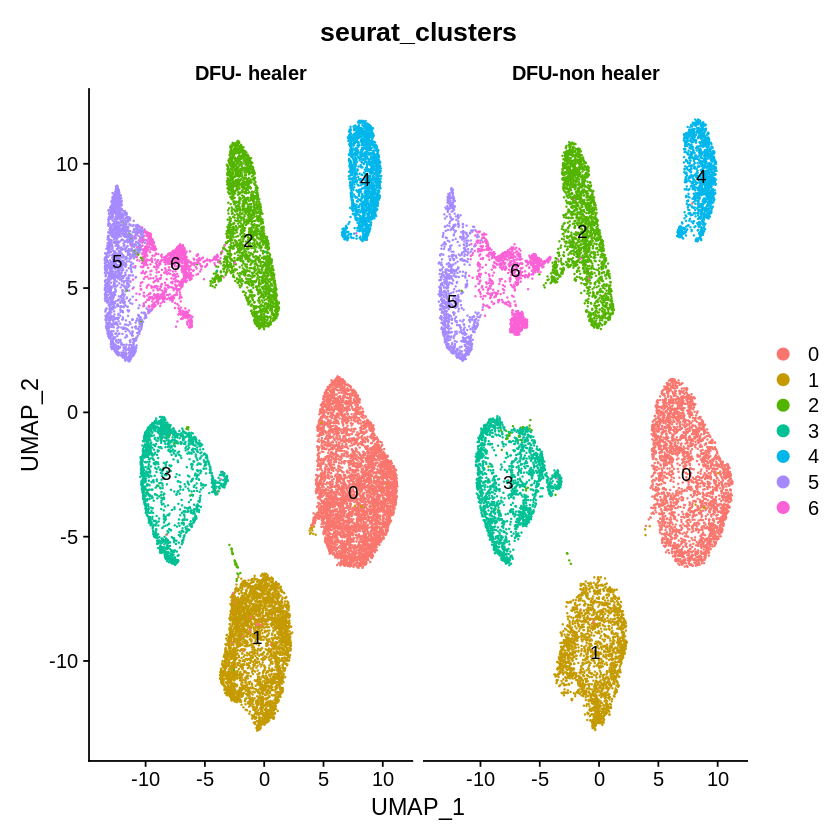

In [8]:
DimPlot(merged_data, 
        group.by = 'seurat_clusters', 
        split.by = "major_group", 
        label = TRUE) # Add labels to clusters

In [9]:
DefaultAssay(merged_data)


[1] "integrated"

In [10]:
DefaultAssay(merged_data) <- "RNA"

#Sub-cluster macrophage

In [11]:
Idents(merged_data)

AAACCTGAGGCAGGTT_1    AAACCTGAGGGAACGG_1    AAACCTGAGGTGATTA_1 
                    0                     4                     1 
   AAACCTGAGTTAACGA_1    AAACCTGCATGTTGAC_1    AAACCTGGTGACTCAT_1 
                    0                     1                     0 
   AAACCTGGTTCAGTAC_1    AAACCTGTCCGCATAA_1    AAACCTGTCGGAAACG_1 
                    5                     1                     1 
   AAACCTGTCGGAAATA_1    AAACGGGAGGTAAACT_1    AAACGGGAGTAGGTGC_1 
                    4                     0                     0 
   AAACGGGCAATAGCGG_1    AAACGGGCATCGATGT_1    AAACGGGCATCGGGTC_1 
                    4                     1                     0 
   AAACGGGGTAAGTGGC_1    AAACGGGGTACTTGAC_1    AAACGGGTCGCTTAGA_1 
                    0                     4                     0 
   AAACGGGTCGGTTCGG_1    AAAGATGAGAATTGTG_1    AAAGATGAGAGTAAGG_1 
                    0                     0                     4 
   AAAGATGAGGAGCGTT_1    AAAGATGCAAGAAGAG_1    AAAGATGCACGGACAA_1 
                    0                     4                     1 
   AAAGATGCAGCCTATA_1    AAAGATGTCCTAGAAC_1    AAAGATGTCGTTTAGG_1 
                    0                     0                     0 
   AAAGATGTCTTCGAGA_1    AAAGCAAAGCTCCCAG_1    AAAGCAAAGTGAATTG_1 
                    1                     0                     0 
   AAAGCAACACATTTCT_1    AAAGCAACATTAGCCA_1    AAAGCAAGTACCGCTG_1 
                    0                     0                     0 
   AAAGCAAGTATCAGTC_1    AAAGCAAGTCTTGCGG_1    AAAGCAAGTTCACGGC_1 
                    1                     0                     0 
   AAAGCAATCTGACCTC_1    AAAGTAGAGGCGACAT_1    AAAGTAGCAGGTGCCT_1 
                    0                     0                     1 
   AAAGTAGGTCCAACTA_1    AAAGTAGGTCCGTTAA_1    AAAGTAGGTCTTCGTC_1 
                    0                     4                     0 
   AAAGTAGGTTAGGGTG_1    AAAGTAGTCAGTGTTG_1    AAATGCCAGTGATCGG_1 
                    0                     0                     4 
   AAATGCCAGTTGAGTA_1    AAATGCCAGTTGTAGA_1    AAATGCCCAAACCTAC_1 
                    0                     1                     4 
   AAATGCCCAGGTGGAT_1    AAATGCCGTACCGTTA_1    AAATGCCGTCTAGTGT_1 
                    0                     0                     1 
   AAATGCCGTGTGGTTT_1    AAATGCCGTTCCCTTG_1    AAATGCCTCACCGGGT_1 
                    0                     5                     4 
   AAATGCCTCCGAATGT_1    AACACGTAGAATTGTG_1    AACACGTAGACTTGAA_1 
                    0                     0                     4 
   AACACGTAGGATGCGT_1    AACACGTAGTTTAGGA_1    AACACGTCAAGCGTAG_1 
                    4                     4                     1 
   AACACGTGTAGCAAAT_1    AACACGTGTCAATACC_1    AACACGTGTTTGTTTC_1 
                    1                     1                     0 
   AACACGTTCATAGCAC_1    AACCATGAGTCTCGGC_1    AACCATGCAAACGTGG_1 
                    0                     6                     0 
   AACCATGGTCGGCTCA_1    AACCATGTCATCGATG_1    AACCATGTCCAAACTG_1 
                    4                     0                     0 
   AACCATGTCCAAAGTC_1    AACCGCGCAATCACAC_1    AACCGCGTCCGTTGCT_1 
                    1                     0                     4 
   AACCGCGTCGCTTAGA_1    AACGTTGAGACAGGCT_1    AACGTTGAGCTCCTTC_1 
                    0                     1                     1 
   AACGTTGAGGTTACCT_1    AACGTTGAGTGTGGCA_1    AACGTTGCAAGCGATG_1 
                    2                     2                     2 
   AACGTTGCAAGTCATC_1    AACGTTGGTACCGGCT_1    AACGTTGGTCCAGTGC_1 
                    2                     2                     0 
   AACGTTGGTTGCTCCT_1    AACGTTGTCAGAGACG_1    AACGTTGTCCTTAATC_1 
                    0                     0                     2 
   AACTCAGCAAGTACCT_1    AACTCAGCAGTATGCT_1    AACTCAGGTAGAAGGA_1 
                    4                     0                     3 
   AACTCAGGTCTAAAGA_1    AACTCAGGTGCCTTGG_1    AACTCAGTCTCGTATT_1 
                    0                     0       

In [13]:
cluster5_macrophage <- subset(merged_data, idents = "5")


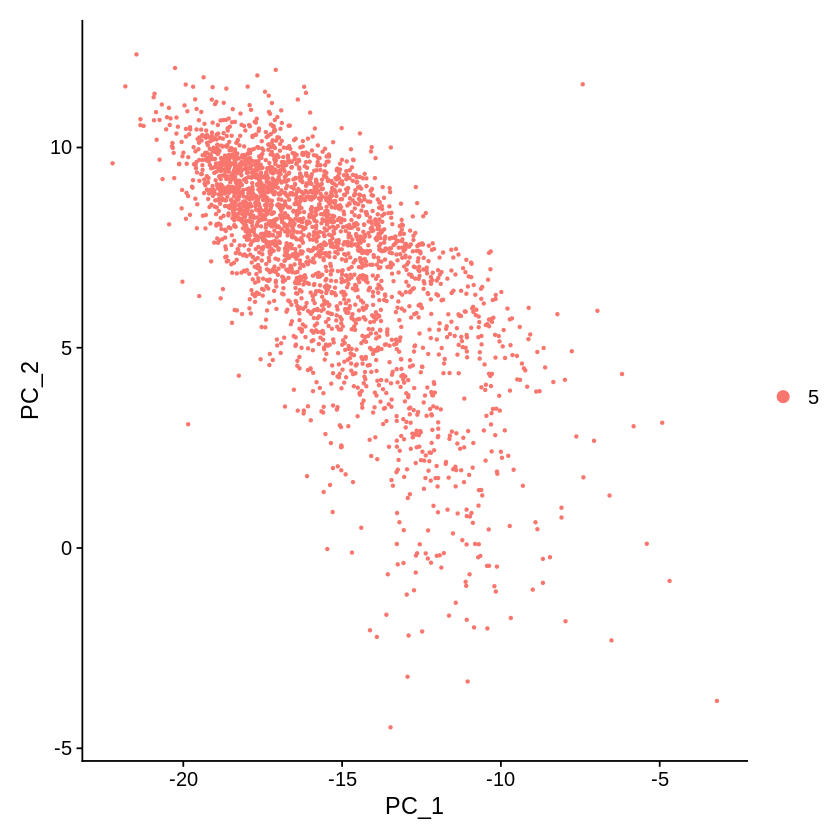

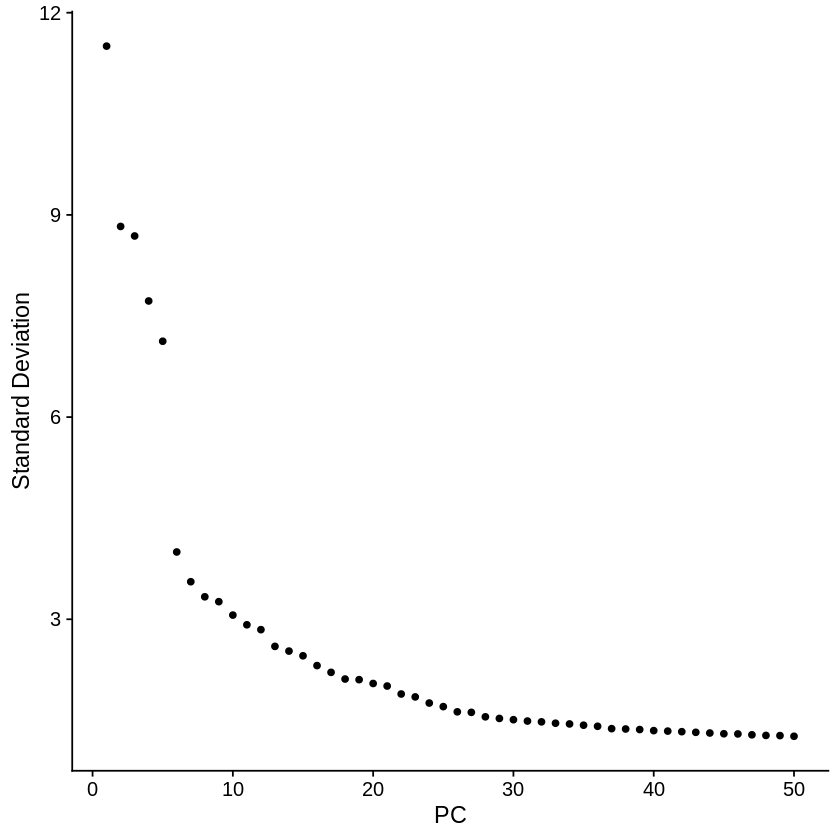

In [14]:
DimPlot(cluster5_macrophage, reduction = "pca")
ElbowPlot(cluster5_macrophage, ndims=50)

Computing nearest neighbor graph

Computing SNN



In [19]:
cluster5_macrophage <- NormalizeData(cluster5_macrophage)
cluster5_macrophage <- ScaleData(cluster5_macrophage)

Centering and scaling data matrix



In [20]:
head(cluster5_macrophage)

orig.ident             nCount_RNA nFeature_RNA percent.mt
AAACCTGGTTCAGTAC_1 GSM5050523_DFU- healer 3456       1080          3.559028 
AAATGCCGTTCCCTTG_1 GSM5050523_DFU- healer 2249        864          5.068920 
AAGGCAGGTCACTTCC_1 GSM5050523_DFU- healer 4478       1439          4.220634 
ACATACGGTTACCAGT_1 GSM5050523_DFU- healer 2523       1003          4.597701 
ACCCACTTCGGTTAAC_1 GSM5050523_DFU- healer 4781       1376          3.723070 
ACGAGCCTCTTGCCGT_1 GSM5050523_DFU- healer 2117       1000         11.667454 
AGATCTGTCTGTTGAG_1 GSM5050523_DFU- healer 8271       2241          3.457865 
AGCTCTCTCTGCGACG_1 GSM5050523_DFU- healer 2729       1024          6.192745 
AGGGTGACACCACGTG_1 GSM5050523_DFU- healer 3094       1256          6.399483 
AGTGTCACATGGGAAC_1 GSM5050523_DFU- healer 3434       1267          3.814793 
                   sample      integrated_snn_res.0.2 seurat_clusters
AAACCTGGTTCAGTAC_1 DFU- healer 5                      5              
AAATGCCGTTCCCTTG_1 DFU- healer 5                      5              
AAGGCAGGTCACTTCC_1 DFU- healer 5                      5              
ACATACGGTTACCAGT_1 DFU- healer 5                      5              
ACCCACTTCGGTTAAC_1 DFU- healer 5                      5              
ACGAGCCTCTTGCCGT_1 DFU- healer 5                      5              
AGATCTGTCTGTTGAG_1 DFU- healer 5                      5              
AGCTCTCTCTGCGACG_1 DFU- healer 5                      5              
AGGGTGACACCACGTG_1 DFU- healer 5                      5              
AGTGTCACATGGGAAC_1 DFU- healer 5                      5              
                   major_group
AAACCTGGTTCAGTAC_1 DFU- healer
AAATGCCGTTCCCTTG_1 DFU- healer
AAGGCAGGTCACTTCC_1 DFU- healer
ACATACGGTTACCAGT_1 DFU- healer
ACCCACTTCGGTTAAC_1 DFU- healer
ACGAGCCTCTTGCCGT_1 DFU- healer
AGATCTGTCTGTTGAG_1 DFU- healer
AGCTCTCTCTGCGACG_1 DFU- healer
AGGGTGACACCACGTG_1 DFU- healer
AGTGTCACATGGGAAC_1 DFU- healer

In [29]:
DefaultAssay(cluster5_macrophage )

[1] "RNA"

In [30]:
DefaultAssay(cluster5_macrophage ) <- "integrated"


In [31]:
cluster5_macrophage <- FindNeighbors(cluster5_macrophage, reduction = "pca", dims = 1:15)
cluster5_macrophage <- FindClusters(cluster5_macrophage, resolution = 0.2)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2740
Number of edges: 95286

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 6
Elapsed time: 0 seconds


In [32]:
cluster5_macrophage <- FindClusters(cluster5_macrophage, resolution = 0.2)


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2740
Number of edges: 95286

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 6
Elapsed time: 0 seconds


In [33]:
cluster5_macrophage <- RunUMAP(cluster5_macrophage, reduction = "pca", dims = 1:15)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:08:41 UMAP embedding parameters a = 0.9922 b = 1.112

18:08:41 Read 2740 rows and found 15 numeric columns

18:08:41 Using Annoy for neighbor search, n_neighbors = 30

18:08:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:08:42 Writing NN index file to temp file /tmp/RtmpDwfZQV/file4674d73b8e15e

18:08:42 Searching Annoy index using 1 thread, search_k = 3000

18:08:42 Annoy recall = 100%

18:08:42 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [34]:
cluster5_macrophage<- RunTSNE(cluster5_macrophage, reduction = "pca", dims = 1:15)


In [35]:
p1 <- DimPlot(cluster5_macrophage, reduction = "umap", label=T) + NoLegend()
p2 <- DimPlot(cluster5_macrophage, reduction = "tsne", label=T) + NoLegend()

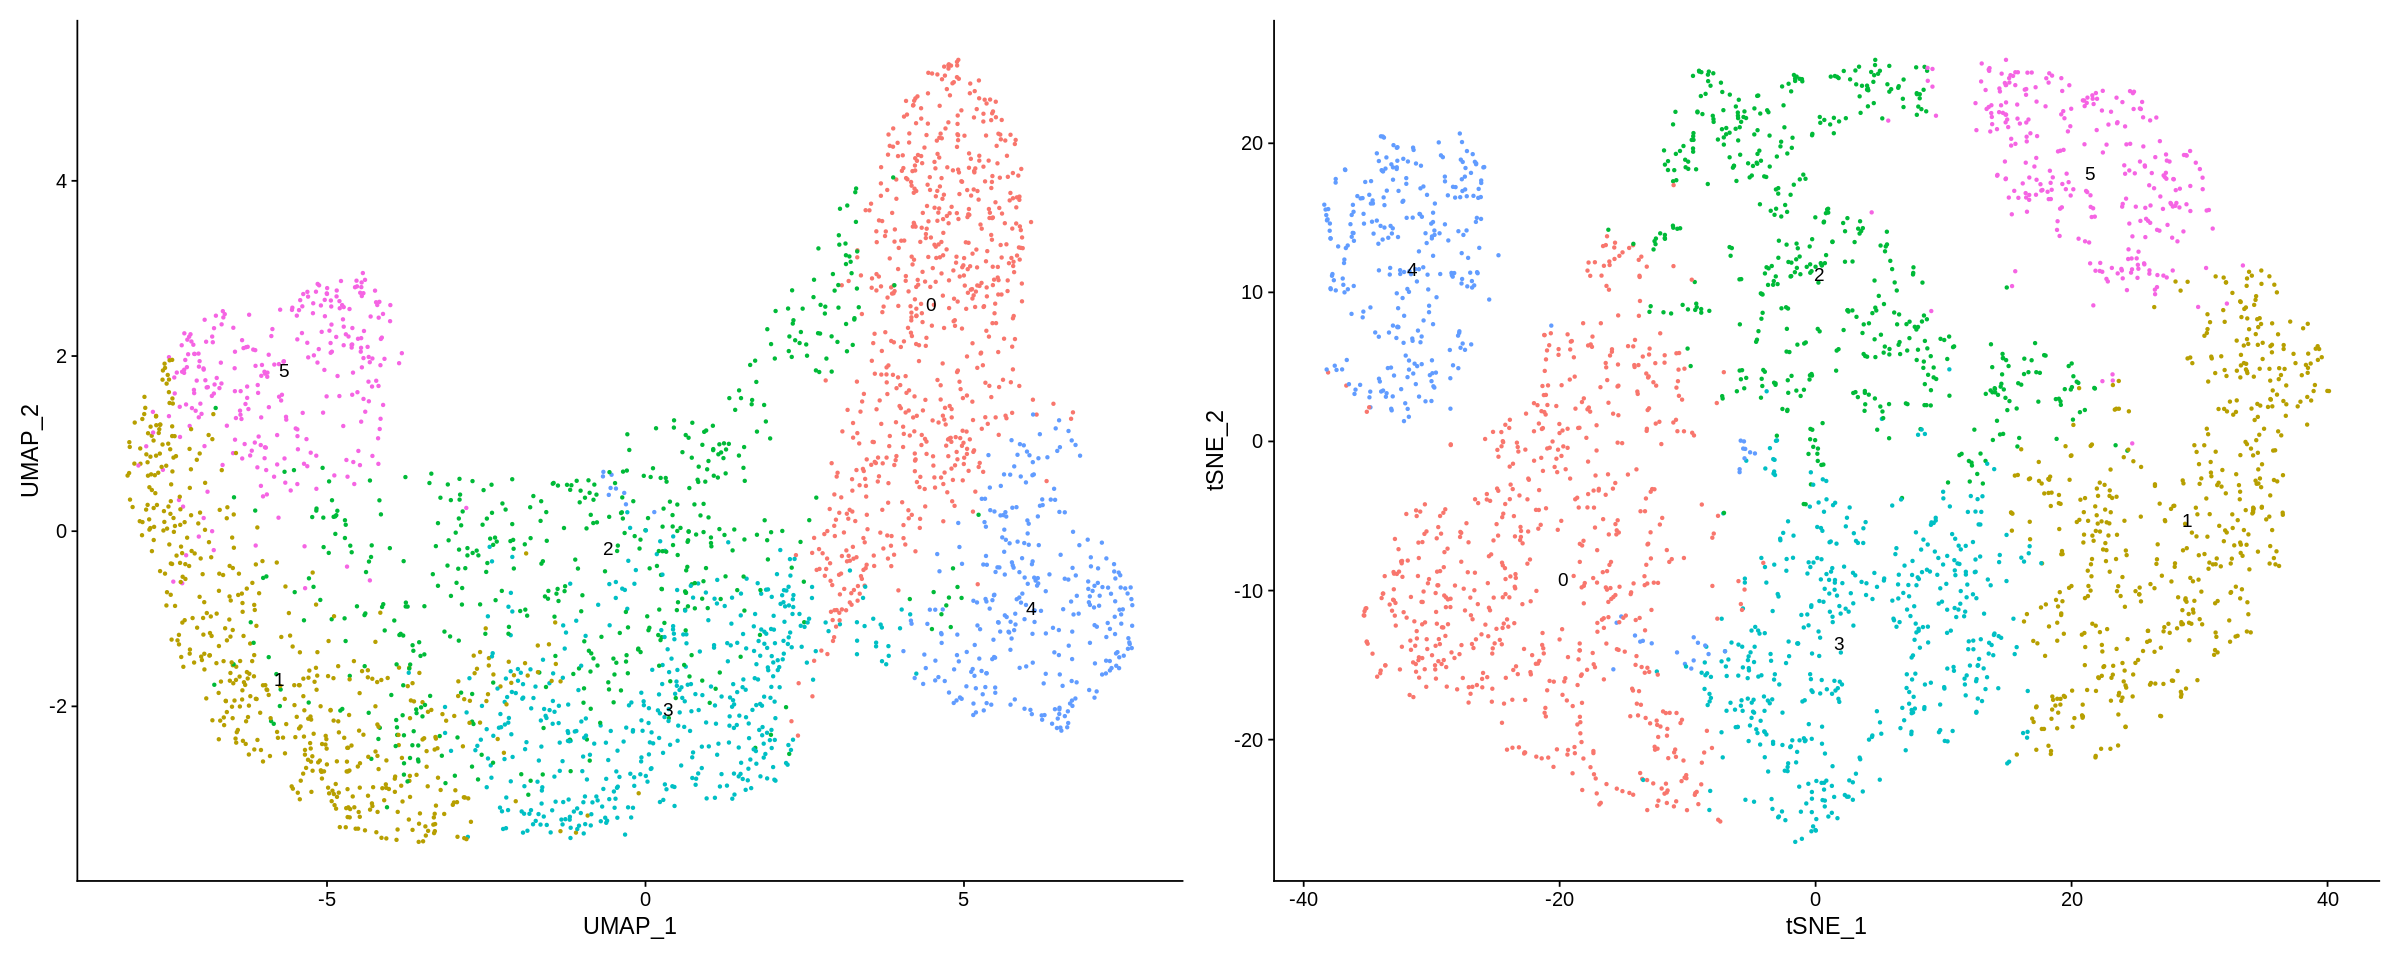

In [36]:
options(repr.plot.width = 20, repr.plot.height = 8)
p1+p2

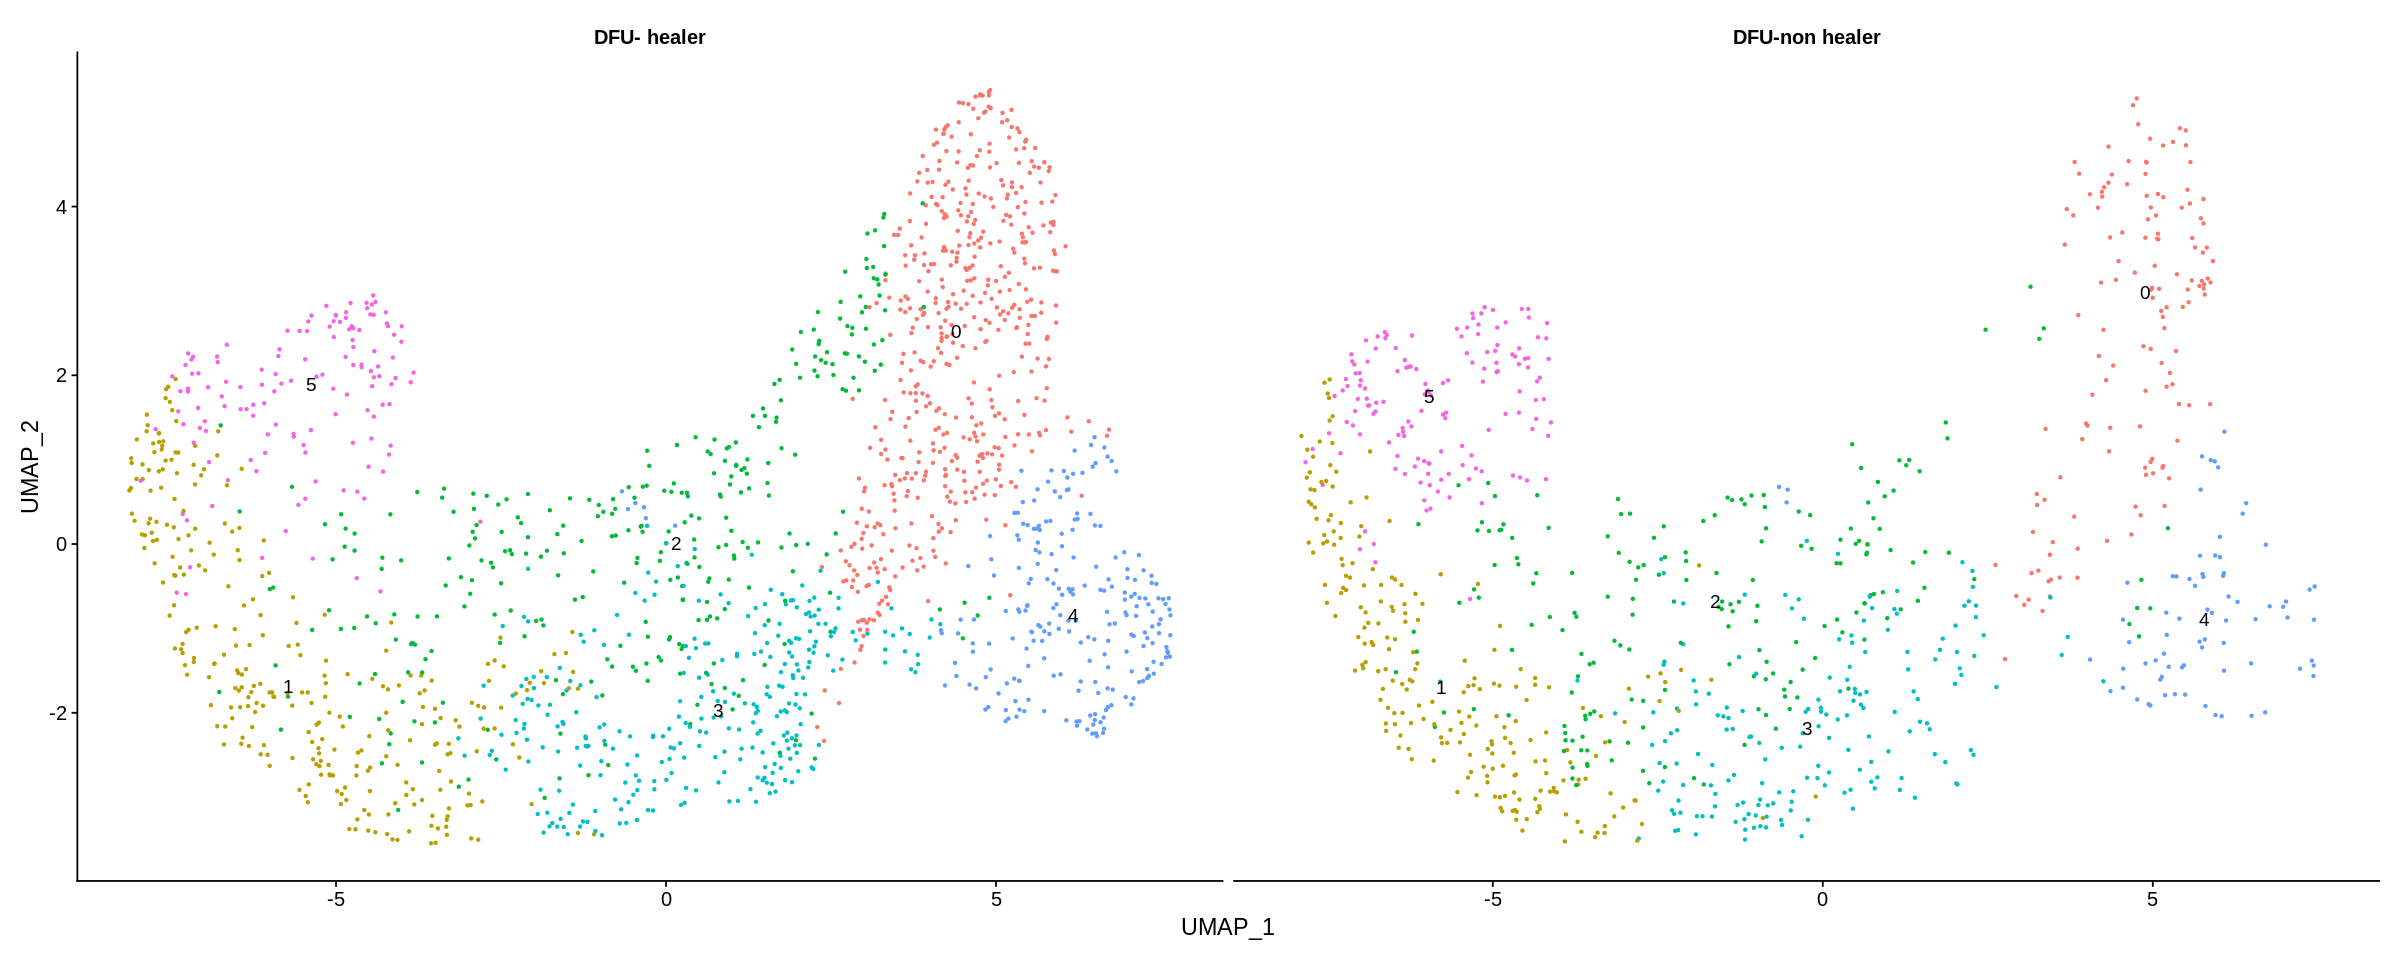

In [38]:
p3 <- DimPlot(cluster5_macrophage, reduction = "umap", label=T,  split.by = "major_group") + NoLegend()
p3


In [39]:
cluster5_macrophage$major_group <- ifelse(grepl("_DFU-non healer$", cluster5_macrophage$orig.ident), "DFU-non healer", "DFU- healer")

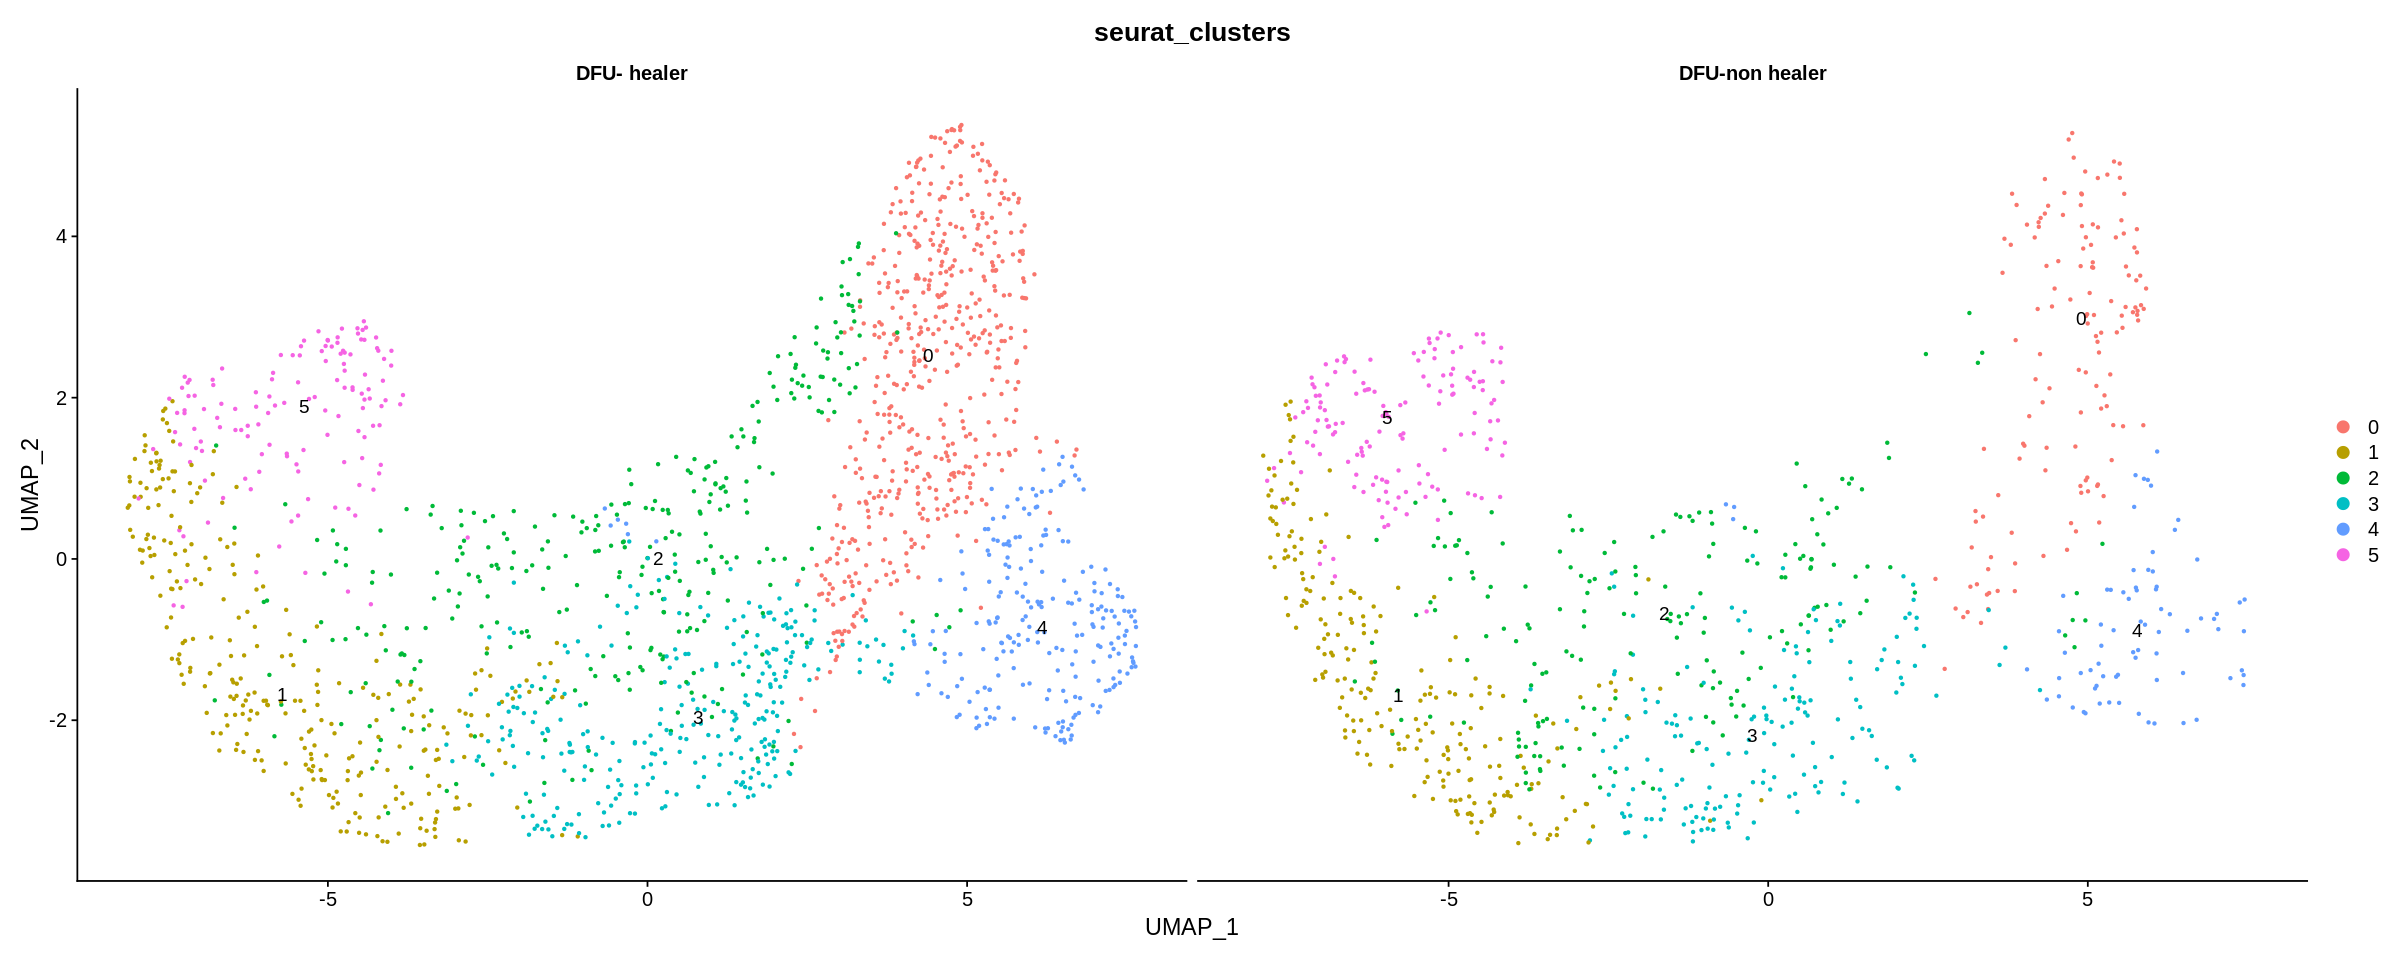

In [40]:
DimPlot(cluster5_macrophage, 
        group.by = 'seurat_clusters', 
        split.by = "major_group", 
        label = TRUE) # Add labels to clusters

In [41]:
cluster5.markers <- FindAllMarkers(obj=cluster5_macrophage,
                                only.pos=FALSE,
                                min.pct=0.25,
                                logfc.thrshold=logFCfilter)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5



In [43]:
 #Define your filter conditions
logFCfilter <- 1.0  # You can change this value to your desired threshold
adjPvalfilter <- 0.05  # You can change this value to your desired threshold

# Subset the data frame using the filter conditions
subset5_markers <- cluster5.markers[
  (abs(as.numeric(as.vector(cluster5.markers$avg_log2FC))) > logFCfilter) &
  (as.numeric(as.vector(cluster5.markers$p_val_adj)) < adjPvalfilter), ]

In [44]:
sig.marker5 <- cluster5.markers[(abs(as.numeric(as.vector(cluster5.markers$avg_log2FC))))>logFCfilter & as.numeric((as.vector(cluster5.markers$p_val_adj))<adjPvalfilter),]

In [45]:
top10 <- cluster5.markers %>% group_by(cluster) %>% top_n(n=10,wt=avg_log2FC)

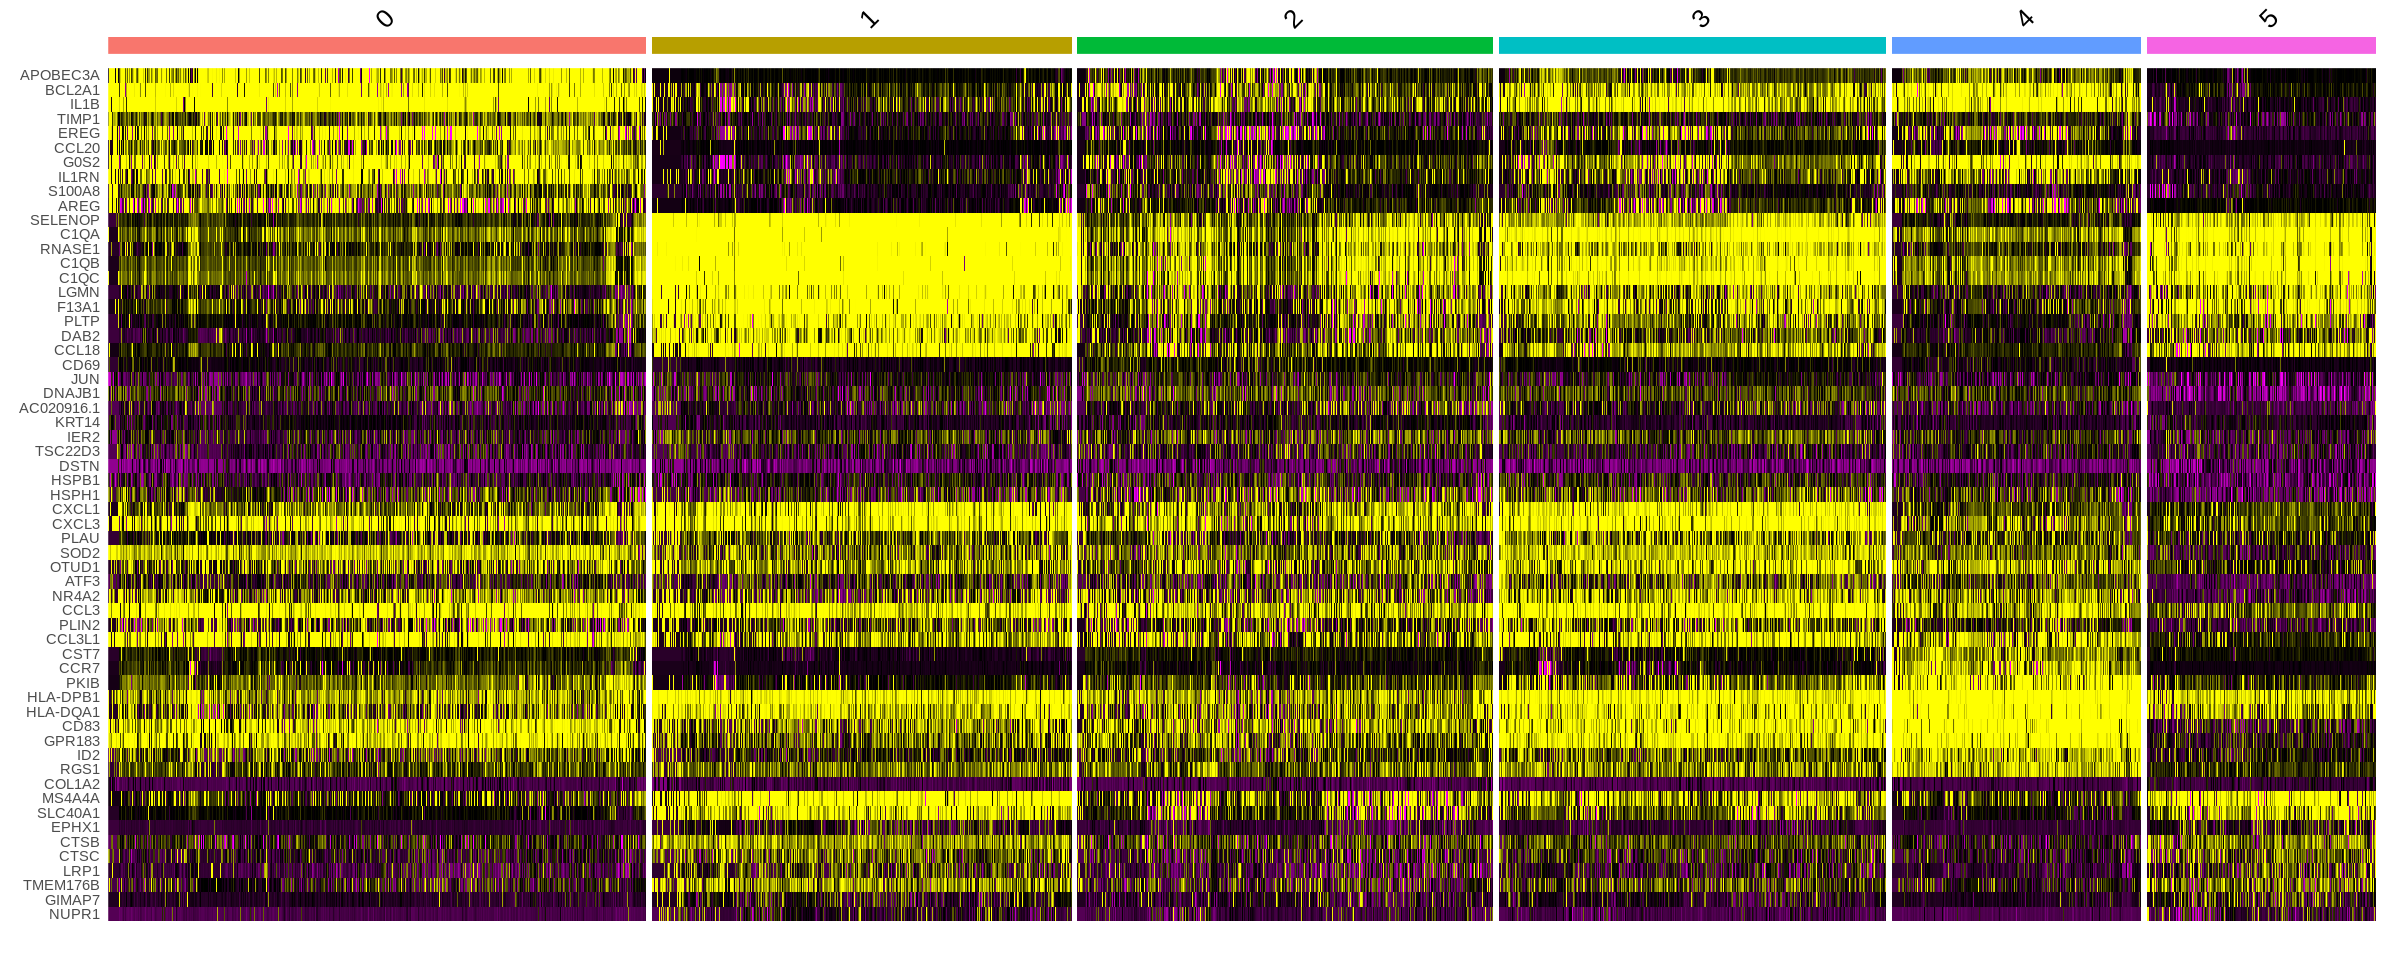

In [46]:
# Check if the object cca.merged.obj exists
if (exists("cluster5_macrophage")) {
  # If it exists, you can proceed with the DoHeatmap function
  DoHeatmap(obj = cluster5_macrophage, features = top10$gene) + NoLegend()
} else {
  # If it doesn't exist, you may need to load or create it
  print("cluster5_macrophage does not exist in the current environment.")
}

In [47]:
cluster_0_genes <- top10 %>%
  filter(cluster == 0)

In [48]:
cluster_0_genes

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene    
1  5.618456e-204 1.986924   0.967 0.876 1.123691e-200 0       APOBEC3A
2  1.602307e-198 1.955061   0.983 0.883 3.204615e-195 0       BCL2A1  
3  6.483573e-181 1.878467   0.992 0.805 1.296715e-177 0       IL1B    
4  1.887623e-157 2.021145   0.991 0.939 3.775247e-154 0       TIMP1   
5  4.013656e-155 2.405147   0.915 0.594 8.027311e-152 0       EREG    
6  6.443432e-138 2.695733   0.895 0.868 1.288686e-134 0       CCL20   
7  6.100957e-135 1.817525   0.947 0.677 1.220191e-131 0       G0S2    
8  1.125172e-123 2.096323   0.909 0.716 2.250344e-120 0       IL1RN   
9  3.781752e-112 1.812445   0.909 0.742 7.563503e-109 0       S100A8  
10  4.509819e-43 1.696687   0.754 0.750  9.019638e-40 0       AREG

In [52]:
cluster_4_genes <- top10 %>%
  filter(cluster == 4)
cluster_4_genes

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene    
1  1.766336e-124 1.181124   0.977 0.900 3.532671e-121 4       CST7    
2  2.729095e-115 1.757273   0.938 0.839 5.458191e-112 4       CCR7    
3   1.934418e-92 1.191405   0.961 0.894  3.868835e-89 4       PKIB    
4   2.522136e-88 1.288983   1.000 0.977  5.044273e-85 4       HLA-DPB1
5   1.070625e-87 1.363052   0.993 0.902  2.141249e-84 4       HLA-DQA1
6   4.227163e-78 1.180517   1.000 0.880  8.454325e-75 4       CD83    
7   1.095663e-72 1.325044   1.000 0.949  2.191326e-69 4       GPR183  
8   3.974606e-72 1.339679   0.987 0.936  7.949212e-69 4       ID2     
9   2.816800e-65 1.397146   1.000 0.981  5.633600e-62 4       RGS1    
10  1.727756e-64 1.702107   0.967 0.714  3.455513e-61 4       G0S2

In [53]:
head(cluster5_macrophage)

orig.ident             nCount_RNA nFeature_RNA percent.mt
AAACCTGGTTCAGTAC_1 GSM5050523_DFU- healer 3456       1080          3.559028 
AAATGCCGTTCCCTTG_1 GSM5050523_DFU- healer 2249        864          5.068920 
AAGGCAGGTCACTTCC_1 GSM5050523_DFU- healer 4478       1439          4.220634 
ACATACGGTTACCAGT_1 GSM5050523_DFU- healer 2523       1003          4.597701 
ACCCACTTCGGTTAAC_1 GSM5050523_DFU- healer 4781       1376          3.723070 
ACGAGCCTCTTGCCGT_1 GSM5050523_DFU- healer 2117       1000         11.667454 
AGATCTGTCTGTTGAG_1 GSM5050523_DFU- healer 8271       2241          3.457865 
AGCTCTCTCTGCGACG_1 GSM5050523_DFU- healer 2729       1024          6.192745 
AGGGTGACACCACGTG_1 GSM5050523_DFU- healer 3094       1256          6.399483 
AGTGTCACATGGGAAC_1 GSM5050523_DFU- healer 3434       1267          3.814793 
                   sample      integrated_snn_res.0.2 seurat_clusters
AAACCTGGTTCAGTAC_1 DFU- healer 3                      3              
AAATGCCGTTCCCTTG_1 DFU- healer 1                      1              
AAGGCAGGTCACTTCC_1 DFU- healer 1                      1              
ACATACGGTTACCAGT_1 DFU- healer 1                      1              
ACCCACTTCGGTTAAC_1 DFU- healer 4                      4              
ACGAGCCTCTTGCCGT_1 DFU- healer 2                      2              
AGATCTGTCTGTTGAG_1 DFU- healer 4                      4              
AGCTCTCTCTGCGACG_1 DFU- healer 1                      1              
AGGGTGACACCACGTG_1 DFU- healer 1                      1              
AGTGTCACATGGGAAC_1 DFU- healer 2                      2              
                   major_group
AAACCTGGTTCAGTAC_1 DFU- healer
AAATGCCGTTCCCTTG_1 DFU- healer
AAGGCAGGTCACTTCC_1 DFU- healer
ACATACGGTTACCAGT_1 DFU- healer
ACCCACTTCGGTTAAC_1 DFU- healer
ACGAGCCTCTTGCCGT_1 DFU- healer
AGATCTGTCTGTTGAG_1 DFU- healer
AGCTCTCTCTGCGACG_1 DFU- healer
AGGGTGACACCACGTG_1 DFU- healer
AGTGTCACATGGGAAC_1 DFU- healer

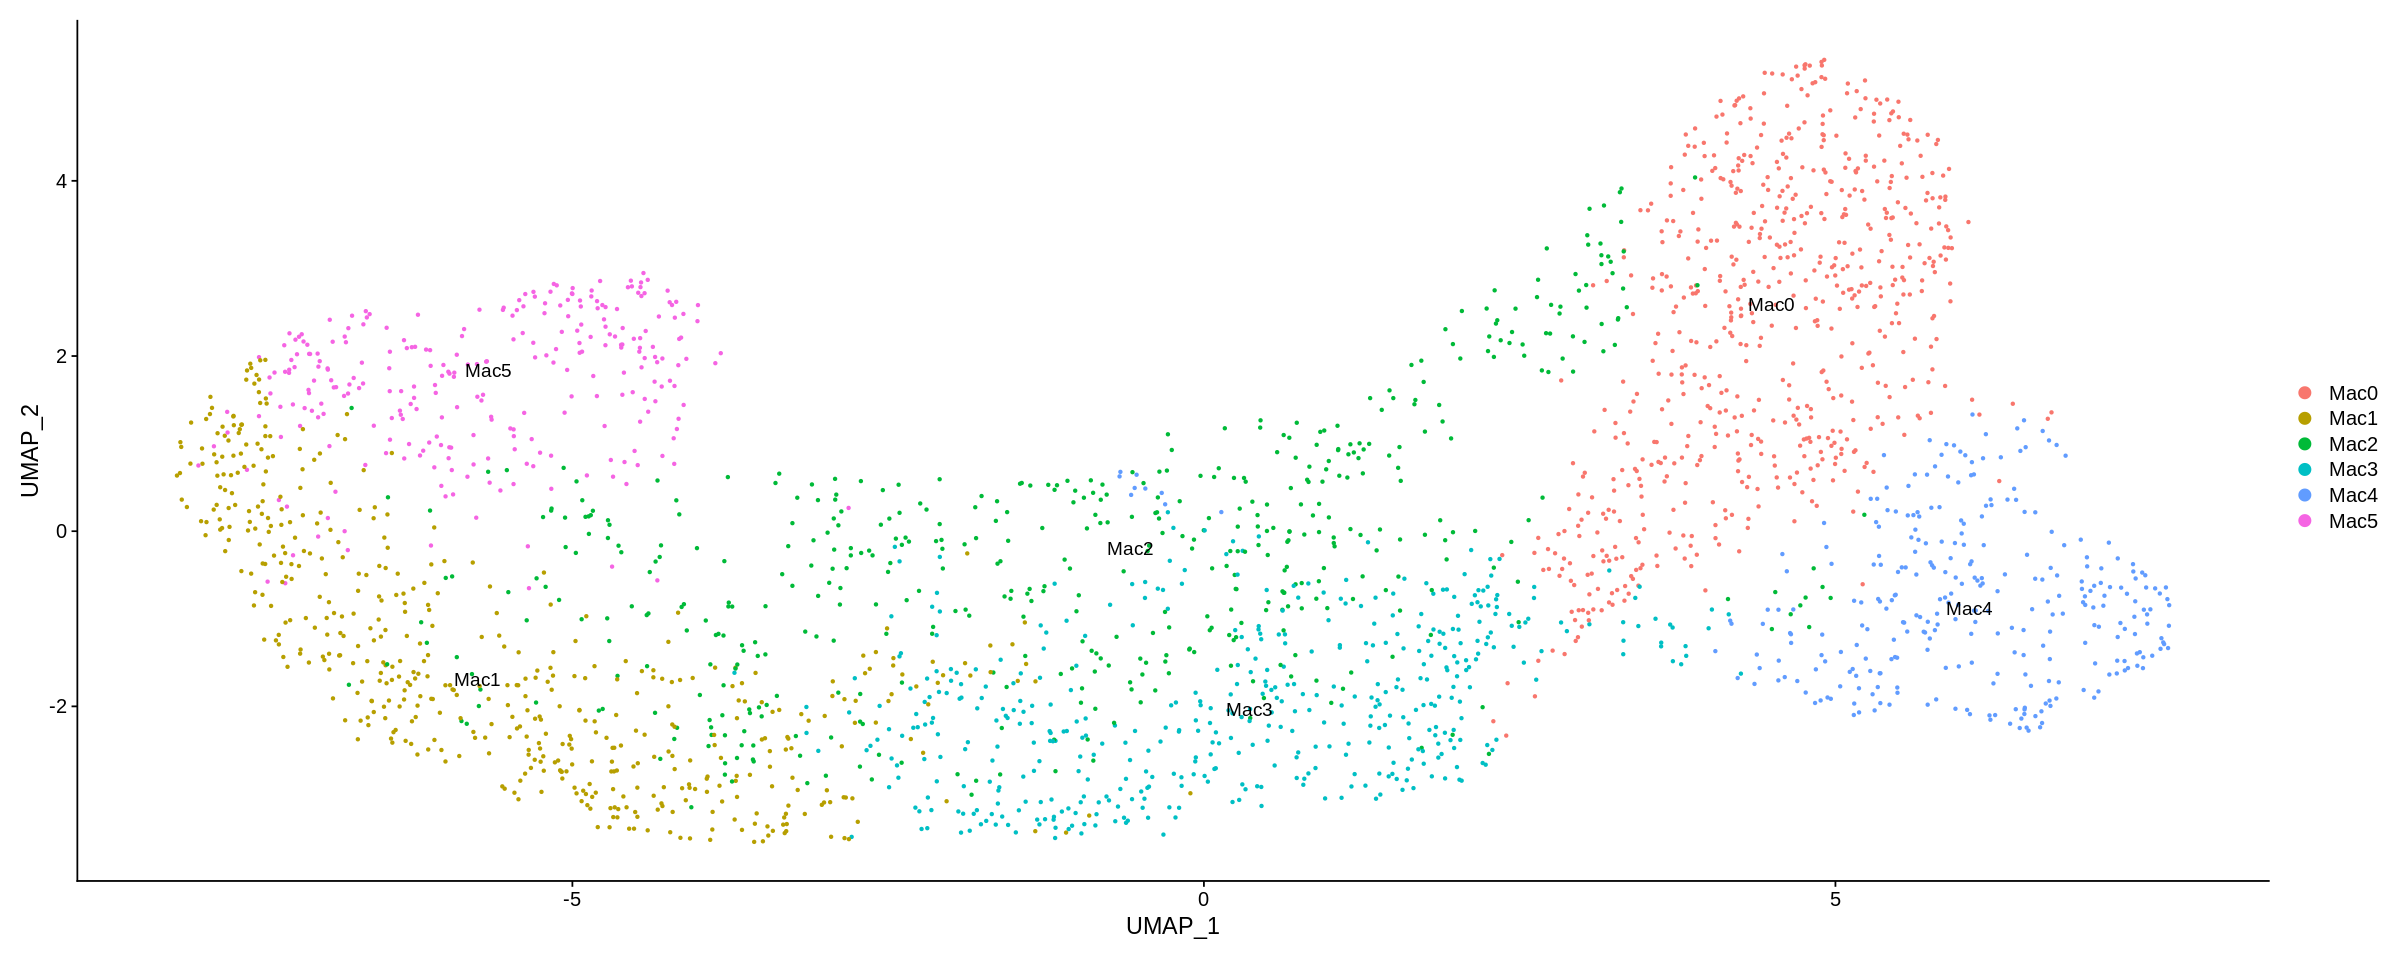

In [54]:
cluster5_macrophage <- RenameIdents( cluster5_macrophage,
  `0` = "Mac0", `1` = "Mac1", `2` = "Mac2",
  `3` = "Mac3", `4` = "Mac4",
  `5` = "Mac5")

DimPlot(cluster5_macrophage , label = TRUE)

In [55]:
Idents(cluster5_macrophage)

AAACCTGGTTCAGTAC_1    AAATGCCGTTCCCTTG_1    AAGGCAGGTCACTTCC_1 
                 Mac3                  Mac1                  Mac1 
   ACATACGGTTACCAGT_1    ACCCACTTCGGTTAAC_1    ACGAGCCTCTTGCCGT_1 
                 Mac1                  Mac4                  Mac2 
   AGATCTGTCTGTTGAG_1    AGCTCTCTCTGCGACG_1    AGGGTGACACCACGTG_1 
                 Mac4                  Mac1                  Mac1 
   AGTGTCACATGGGAAC_1    ATAAGAGTCAATCACG_1    ATCTGCCAGTAGCGGT_1 
                 Mac2                  Mac1                  Mac5 
   ATGGGAGGTGACCAAG_1    CACAAACCAGTGACAG_1    CATCAAGGTGCCTGGT_1 
                 Mac1                  Mac1                  Mac1 
   CATCGGGCACGAAATA_1    CATCGGGCACTGTTAG_1    CATGACATCGTGGTCG_1 
                 Mac5                  Mac0                  Mac2 
   CCACGGAAGGTCATCT_1    CCATGTCCAAGCCGTC_1    CCCAGTTTCCAAACTG_1 
                 Mac0                  Mac3                  Mac1 
   CCCATACGTGTGGTTT_1    CCTACACGTTGCGTTA_1    CCTAGCTTCGAATCCA_1 
                 Mac1                  Mac1                  Mac2 
   CCTATTAGTATATGGA_1    CCTTACGCAGTCGTGC_1    CGAATGTAGTTAGGTA_1 
                 Mac4                  Mac1                  Mac1 
   CGATCGGCACGAAACG_1    CGATTGACAGGAATGC_1    CGCTTCAGTCTTCTCG_1 
                 Mac2                  Mac4                  Mac1 
   CGTCTACAGTGACTCT_1    CGTCTACTCTTACCGC_1    CGTGAGCCAGGGAGAG_1 
                 Mac0                  Mac4                  Mac1 
   CGTGAGCTCAGGTTCA_1    CTACCCAGTGTGAAAT_1    CTAGAGTCAAGTACCT_1 
                 Mac4                  Mac4                  Mac1 
   CTAGTGATCTCATTCA_1    CTCACACCACGAAACG_1    CTCGAAACAATAGCAA_1 
                 Mac1                  Mac1                  Mac3 
   CTCGAGGTCAACGGCC_1    CTCTACGAGTTACGGG_1    CTCTACGTCCTATTCA_1 
                 Mac2                  Mac1                  Mac4 
   CTGCCTACAAGTAGTA_1    GACGCGTAGCCCAGCT_1    GACGGCTGTACCGGCT_1 
                 Mac4                  Mac4                  Mac1 
   GACGTGCCAAAGGAAG_1    GACGTTAAGTGGAGAA_1    GATCAGTGTTGGAGGT_1 
                 Mac0                  Mac4                  Mac0 
   GATTCAGGTAACGTTC_1    GCAAACTTCGTTACAG_1    GCATGATTCTCTAAGG_1 
                 Mac1                  Mac3                  Mac0 
   GCGCAGTGTAAACACA_1    GCTGCTTTCCTGCTTG_1    GGACAGATCAAGGCTT_1 
                 Mac3                  Mac0                  Mac4 
   GGATTACGTGCACGAA_1    GGCGACTAGCAATCTC_1    GGGACCTGTTGTCGCG_1 
                 Mac0                  Mac1                  Mac0 
   GGGATGATCAGTACGT_1    GGTGAAGGTGCTCTTC_1    GTACTTTCAAGGACTG_1 
                 Mac3                  Mac3                  Mac1 
   GTACTTTCACCAACCG_1    GTAGGCCTCTATCGCC_1    GTATCTTGTGAGTATA_1 
                 Mac1                  Mac1                  Mac0 
   GTCAAGTCAGGGAGAG_1    GTCACAACACACAGAG_1    GTCACAACATCACGTA_1 
                 Mac1                  Mac1                  Mac1 
   GTGAAGGTCTCACATT_1    GTGCTTCTCCCTCAGT_1    GTTCTCGGTCTTGATG_1 
                 Mac2                  Mac1                  Mac1 
   TACACGAAGAGTCTGG_1    TACGGATAGTCCAGGA_1    TACTCGCAGACCTAGG_1 
                 Mac0                  Mac2                  Mac1 
   TAGAGCTAGCAGACTG_1    TAGAGCTAGGGATGGG_1    TGCACCTGTCCGAACC_1 
                 Mac0                  Mac2                  Mac1 
   TTCTTAGAGAATGTTG_1    TTCTTAGCAGGGTATG_1    TTGCGTCAGTGAACGC_1 
                 Mac5                  Mac5                  Mac1 
   TTGCGTCGTCATGCCG_1    TTGGCAAGTTTAAGCC_1    TTTGCGCGTGGCAAAC_1 
                 Mac1                  Mac0                  Mac1 
   AAACGGGGTCCAAGTT_2    AAAGATGGTCTGATTG_2    AAAGCAATCAGCGACC_2 
                 Mac5                  Mac0                  Mac1 
   AAATGCCCAGGGAGAG_2    AAATGCCGTTAAGTAG_2    AAGCCGCTCCCGACTT_2 
                 Mac4                  Mac4                  Mac0 
   AAGGCAGCATGTCCTC_2    AATCCAGAGACAGAGA_2    ACACCAACAACACGCC_2 
                 Mac3                  Mac5       

In [56]:
cluster5_macrophage$celltypes <- Idents(cluster5_macrophage)

In [57]:
cluster5_macrophage$healer_nonhealer <- paste(cluster5_macrophage$major_group, sep = "_", Idents(cluster5_macrophage))

In [58]:
Idents(cluster5_macrophage) <- "healer_nonhealer"

In [59]:
Idents(cluster5_macrophage)

AAACCTGGTTCAGTAC_1    AAATGCCGTTCCCTTG_1    AAGGCAGGTCACTTCC_1 
     DFU- healer_Mac3      DFU- healer_Mac1      DFU- healer_Mac1 
   ACATACGGTTACCAGT_1    ACCCACTTCGGTTAAC_1    ACGAGCCTCTTGCCGT_1 
     DFU- healer_Mac1      DFU- healer_Mac4      DFU- healer_Mac2 
   AGATCTGTCTGTTGAG_1    AGCTCTCTCTGCGACG_1    AGGGTGACACCACGTG_1 
     DFU- healer_Mac4      DFU- healer_Mac1      DFU- healer_Mac1 
   AGTGTCACATGGGAAC_1    ATAAGAGTCAATCACG_1    ATCTGCCAGTAGCGGT_1 
     DFU- healer_Mac2      DFU- healer_Mac1      DFU- healer_Mac5 
   ATGGGAGGTGACCAAG_1    CACAAACCAGTGACAG_1    CATCAAGGTGCCTGGT_1 
     DFU- healer_Mac1      DFU- healer_Mac1      DFU- healer_Mac1 
   CATCGGGCACGAAATA_1    CATCGGGCACTGTTAG_1    CATGACATCGTGGTCG_1 
     DFU- healer_Mac5      DFU- healer_Mac0      DFU- healer_Mac2 
   CCACGGAAGGTCATCT_1    CCATGTCCAAGCCGTC_1    CCCAGTTTCCAAACTG_1 
     DFU- healer_Mac0      DFU- healer_Mac3      DFU- healer_Mac1 
   CCCATACGTGTGGTTT_1    CCTACACGTTGCGTTA_1    CCTAGCTTCGAATCCA_1 
     DFU- healer_Mac1      DFU- healer_Mac1      DFU- healer_Mac2 
   CCTATTAGTATATGGA_1    CCTTACGCAGTCGTGC_1    CGAATGTAGTTAGGTA_1 
     DFU- healer_Mac4      DFU- healer_Mac1      DFU- healer_Mac1 
   CGATCGGCACGAAACG_1    CGATTGACAGGAATGC_1    CGCTTCAGTCTTCTCG_1 
     DFU- healer_Mac2      DFU- healer_Mac4      DFU- healer_Mac1 
   CGTCTACAGTGACTCT_1    CGTCTACTCTTACCGC_1    CGTGAGCCAGGGAGAG_1 
     DFU- healer_Mac0      DFU- healer_Mac4      DFU- healer_Mac1 
   CGTGAGCTCAGGTTCA_1    CTACCCAGTGTGAAAT_1    CTAGAGTCAAGTACCT_1 
     DFU- healer_Mac4      DFU- healer_Mac4      DFU- healer_Mac1 
   CTAGTGATCTCATTCA_1    CTCACACCACGAAACG_1    CTCGAAACAATAGCAA_1 
     DFU- healer_Mac1      DFU- healer_Mac1      DFU- healer_Mac3 
   CTCGAGGTCAACGGCC_1    CTCTACGAGTTACGGG_1    CTCTACGTCCTATTCA_1 
     DFU- healer_Mac2      DFU- healer_Mac1      DFU- healer_Mac4 
   CTGCCTACAAGTAGTA_1    GACGCGTAGCCCAGCT_1    GACGGCTGTACCGGCT_1 
     DFU- healer_Mac4      DFU- healer_Mac4      DFU- healer_Mac1 
   GACGTGCCAAAGGAAG_1    GACGTTAAGTGGAGAA_1    GATCAGTGTTGGAGGT_1 
     DFU- healer_Mac0      DFU- healer_Mac4      DFU- healer_Mac0 
   GATTCAGGTAACGTTC_1    GCAAACTTCGTTACAG_1    GCATGATTCTCTAAGG_1 
     DFU- healer_Mac1      DFU- healer_Mac3      DFU- healer_Mac0 
   GCGCAGTGTAAACACA_1    GCTGCTTTCCTGCTTG_1    GGACAGATCAAGGCTT_1 
     DFU- healer_Mac3      DFU- healer_Mac0      DFU- healer_Mac4 
   GGATTACGTGCACGAA_1    GGCGACTAGCAATCTC_1    GGGACCTGTTGTCGCG_1 
     DFU- healer_Mac0      DFU- healer_Mac1      DFU- healer_Mac0 
   GGGATGATCAGTACGT_1    GGTGAAGGTGCTCTTC_1    GTACTTTCAAGGACTG_1 
     DFU- healer_Mac3      DFU- healer_Mac3      DFU- healer_Mac1 
   GTACTTTCACCAACCG_1    GTAGGCCTCTATCGCC_1    GTATCTTGTGAGTATA_1 
     DFU- healer_Mac1      DFU- healer_Mac1      DFU- healer_Mac0 
   GTCAAGTCAGGGAGAG_1    GTCACAACACACAGAG_1    GTCACAACATCACGTA_1 
     DFU- healer_Mac1      DFU- healer_Mac1      DFU- healer_Mac1 
   GTGAAGGTCTCACATT_1    GTGCTTCTCCCTCAGT_1    GTTCTCGGTCTTGATG_1 
     DFU- healer_Mac2      DFU- healer_Mac1      DFU- healer_Mac1 
   TACACGAAGAGTCTGG_1    TACGGATAGTCCAGGA_1    TACTCGCAGACCTAGG_1 
     DFU- healer_Mac0      DFU- healer_Mac2      DFU- healer_Mac1 
   TAGAGCTAGCAGACTG_1    TAGAGCTAGGGATGGG_1    TGCACCTGTCCGAACC_1 
     DFU- healer_Mac0      DFU- healer_Mac2      DFU- healer_Mac1 
   TTCTTAGAGAATGTTG_1    TTCTTAGCAGGGTATG_1    TTGCGTCAGTGAACGC_1 
     DFU- healer_Mac5      DFU- healer_Mac5      DFU- healer_Mac1 
   TTGCGTCGTCATGCCG_1    TTGGCAAGTTTAAGCC_1    TTTGCGCGTGGCAAAC_1 
     DFU- healer_Mac1      DFU- healer_Mac0      DFU- healer_Mac1 
   AAACGGGGTCCAAGTT_2    AAAGATGGTCTGATTG_2    AAAGCAATCAGCGACC_2 
     DFU- healer_Mac5      DFU- healer_Mac0      DFU- healer_Mac1 
   AAATGCCCAGGGAGAG_2    AAATGCCGTTAAGTAG_2    AAGCCGCTCCCGACTT_2 
     DFU- healer_Mac4      DFU- healer_Mac4      DFU- healer_Mac0 
   AAGGCAGCATGTCCTC_2    AATCCAGAGACAGAGA_2    ACACCAACAACACGCC_2 
     DFU- healer_Mac3      DFU- healer_Mac5      D

In [60]:
saveRDS(cluster5_macrophage, file = "/data2/ZenNa/DFU_Project/Result/macrophageclustered_data.rds")


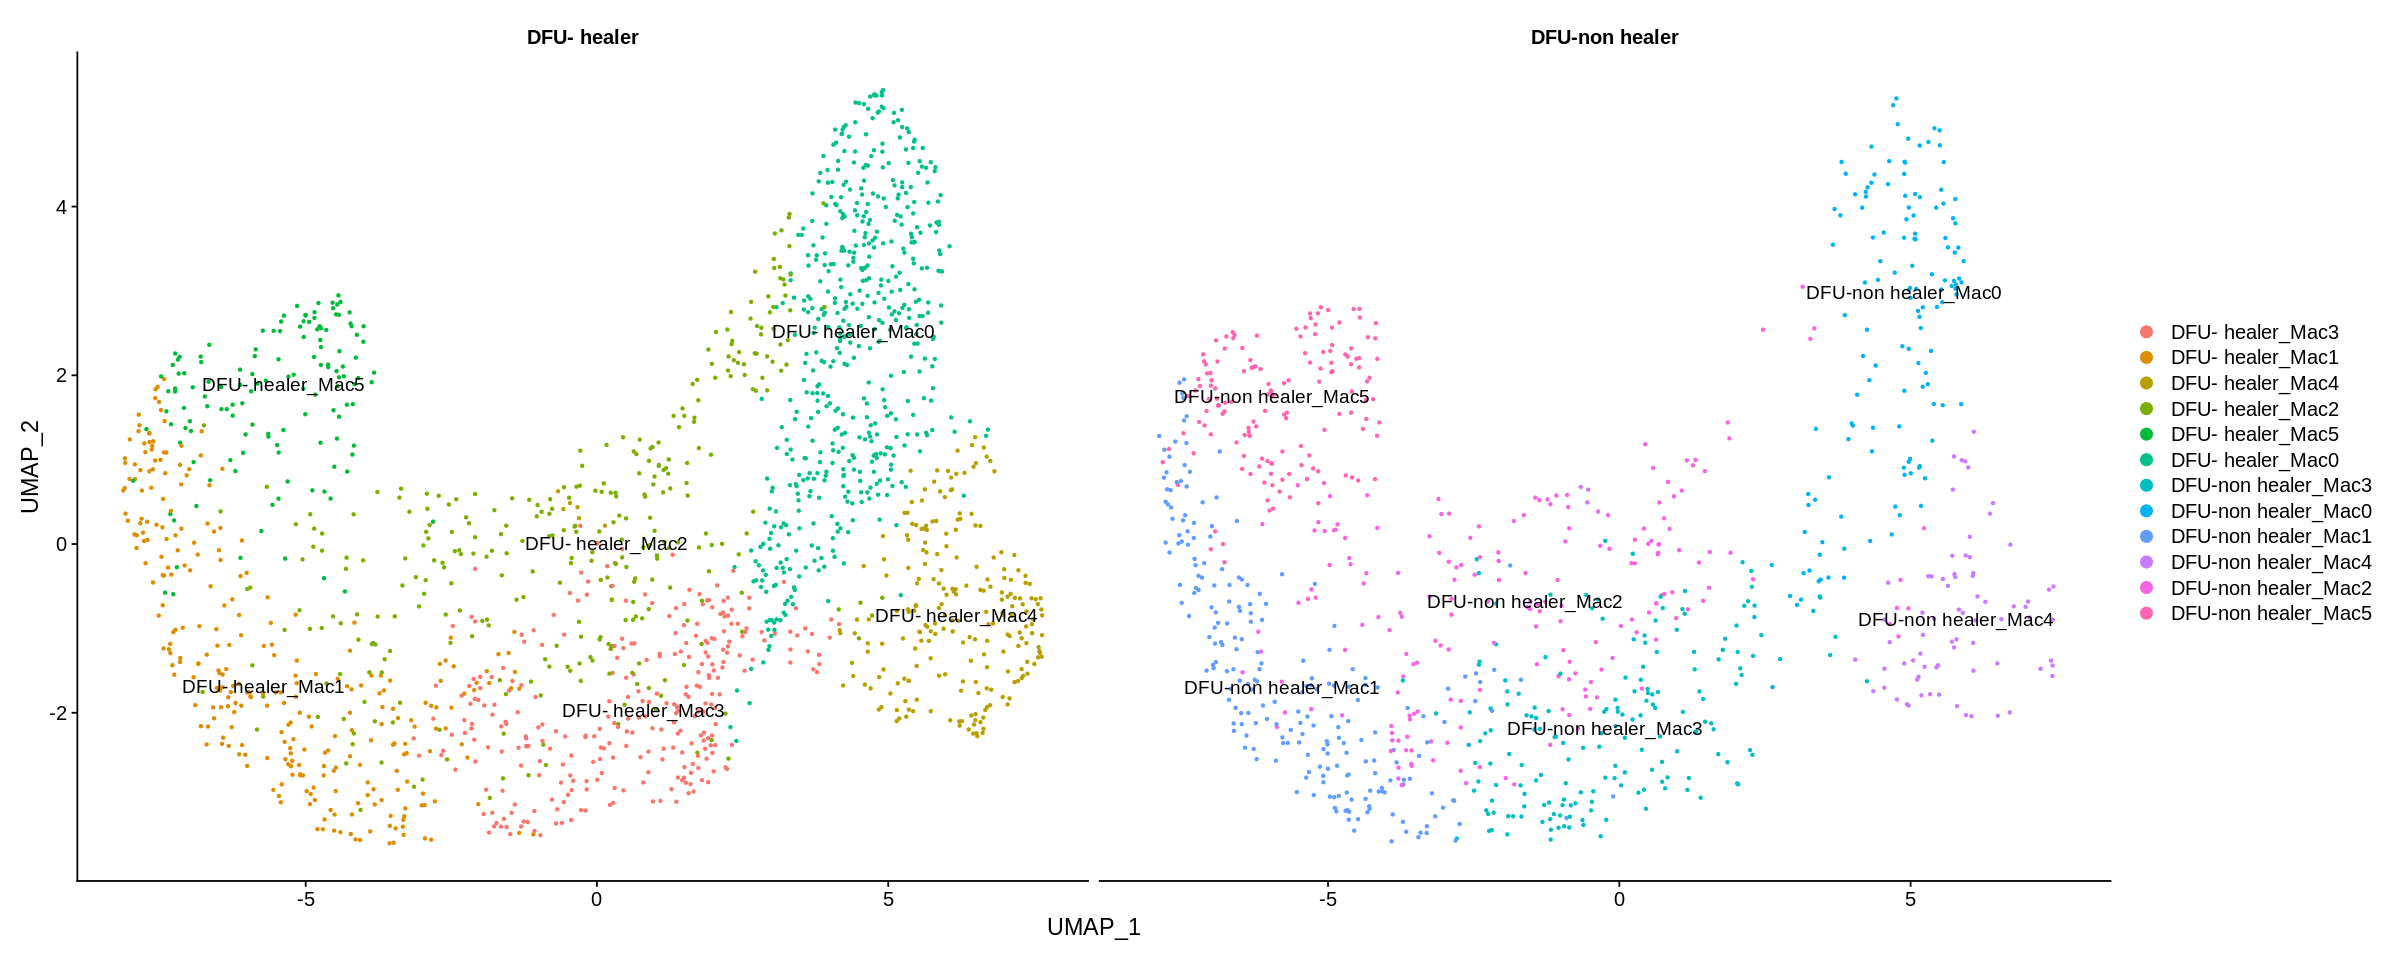

In [61]:
options(repr.plot.width = 20, repr.plot.height = 8)
DimPlot(cluster5_macrophage, 
               split.by = "major_group", 
        label = TRUE)

In [81]:
Macrophage_Cluster0_DEGs_pos <- FindMarkers(cluster5_macrophage, ident.1 = "DFU- healer_Mac0", ident.2 = "DFU-non healer_Mac0", only.pos = TRUE, min.pct= 0.25,
logfc.threshold = 0.25 ,verbose = FALSE)

In [82]:
Macrophage_Cluster0_DEGs <- FindMarkers(cluster5_macrophage, ident.1 = "DFU- healer_Mac0", ident.2 = "DFU-non healer_Mac0",min.pct= 0.25,
logfc.threshold = 0.25, verbose = FALSE)

In [65]:
install.packages("writexl")
library("writexl")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [83]:
output_file <- "/data2/ZenNa/DFU_Project/Result/Macrophage_Cluster0_DEGs_pos.csv"
write.csv(Macrophage_Cluster0_DEGs_pos , file = output_file, row.names = TRUE)

In [84]:
output_file <- "/data2/ZenNa/DFU_Project/Result/Macrophage_Cluster0_DEGs.csv"
write.csv(Macrophage_Cluster0_DEGs, file = output_file, row.names = TRUE)

In [85]:
Macrophage_Cluster4_DEGs_pos <- FindMarkers(cluster5_macrophage, ident.1 = "DFU- healer_Mac4", ident.2 = "DFU-non healer_Mac4", only.pos = TRUE,min.pct= 0.25,
logfc.threshold = 0.25, verbose = FALSE)

In [86]:
Macrophage_Cluster4_DEGs <- FindMarkers(cluster5_macrophage, ident.1 = "DFU- healer_Mac4", ident.2 = "DFU-non healer_Mac4", min.pct= 0.25,
logfc.threshold = 0.25, verbose = FALSE)

In [87]:
output_file <- "/data2/ZenNa/DFU_Project/Result/Macrophage_Cluster4_DEGs_pos.csv"
write.csv(Macrophage_Cluster4_DEGs_pos , file = output_file, row.names = TRUE)

In [88]:
output_file <- "/data2/ZenNa/DFU_Project/Result/Macrophage_Cluster4_DEGs.csv"
write.csv(Macrophage_Cluster4_DEGs, file = output_file, row.names = TRUE)

In [75]:
library(fgsea)

In [76]:
Reactome <- fgsea::gmtPathways("/data2/ZenNa/DFU_Project/Pathways/c2.cp.reactome.v2023.1.Hs.symbols.gmt")
Hallmark <- fgsea::gmtPathways("/data2/ZenNa/DFU_Project/Pathways/h.all.v2023.1.Hs.symbols.gmt")
KEGG <- fgsea::gmtPathways("/data2/ZenNa/DFU_Project/Pathways/c2.cp.kegg.v2023.1.Hs.symbols.gmt")
GO <- fgsea::gmtPathways("/data2/ZenNa/DFU_Project/Pathways/c5.go.bp.v2023.1.Hs.symbols.gmt")

In [91]:
Macrophage_Cluster0_DEGs$gene <- rownames(Macrophage_Cluster0_DEGs)

In [117]:
fold_changes_0<- Macrophage_Cluster0_DEGs$avg_log2FC
names(fold_changes_0) <- Macrophage_Cluster0_DEGs $gene

In [119]:
head(fold_changes_0)

TNIP3  SERPINB2     INHBA     DUSP4      IL7R      GBP1 
0.3405199 0.6007076 0.6971117 0.3360303 0.2890663 0.3449445

In [120]:
GO_Macrophage_Cluster0 <- fgsea(pathways = GO,stats = fold_changes_0, eps = 0.0, minSize = 15, maxSize = 500)  

In [121]:
head(GO_Macrophage_Cluster0[order(pval), ])


pathway                                                        pval       
1 GOBP_POSITIVE_REGULATION_OF_CELL_DEATH                         0.003932713
2 GOBP_HEMOPOIESIS                                               0.023146389
3 GOBP_LEUKOCYTE_MIGRATION                                       0.032738365
4 GOBP_POSITIVE_REGULATION_OF_LOCOMOTION                         0.034674064
5 GOBP_POSITIVE_REGULATION_OF_TRANSCRIPTION_BY_RNA_POLYMERASE_II 0.035161744
6 GOBP_POSITIVE_REGULATION_OF_MAPK_CASCADE                       0.039381153
  padj      log2err   ES        NES      size
1 0.3185497 0.4070179 0.5521078 1.979651 15  
2 0.3288770 0.3524879 0.4912403 1.785898 16  
3 0.3288770 0.3217759 0.4704751 1.710406 16  
4 0.3288770 0.2878571 0.4314772 1.568630 16  
5 0.3288770 0.2878571 0.4504118 1.615007 15  
6 0.3288770 0.2712886 0.4452171 1.596381 15  
  leadingEdge                                                                                      
1 IL6  , INHBA, CCL2 , PTGS2, CTSL , FOS  , HMOX1, JUN                                             
2 IL6    , INHBA  , CTSL   , FOS    , JUNB   , JUN    , TNFAIP6, IL23A                             
3 CCL20  , IL6    , CCL2   , CXCL1  , HMOX1  , TNFAIP6, IL23A  , THBS1  , CCL3L1 , TNF    , CCL5   
4 CCL20  , IL6    , PTGS2  , HMOX1  , JUN    , TNFAIP6, IL23A                                      
5 IL6  , INHBA, FOS  , JUNB , IER2 , JUN  , IL23A                                                  
6 CCL20, IL6  , INHBA, CCL2

In [122]:
topGOPathwaysUp <- GO_Macrophage_Cluster0[ES > 0][head(order(pval), n=10), pathway]
topGOPathwaysDown <- GO_Macrophage_Cluster0[ES < 0][head(order(pval), n=10),pathway]
topGOPathways <- c(topGOPathwaysUp, rev(topGOPathwaysDown))


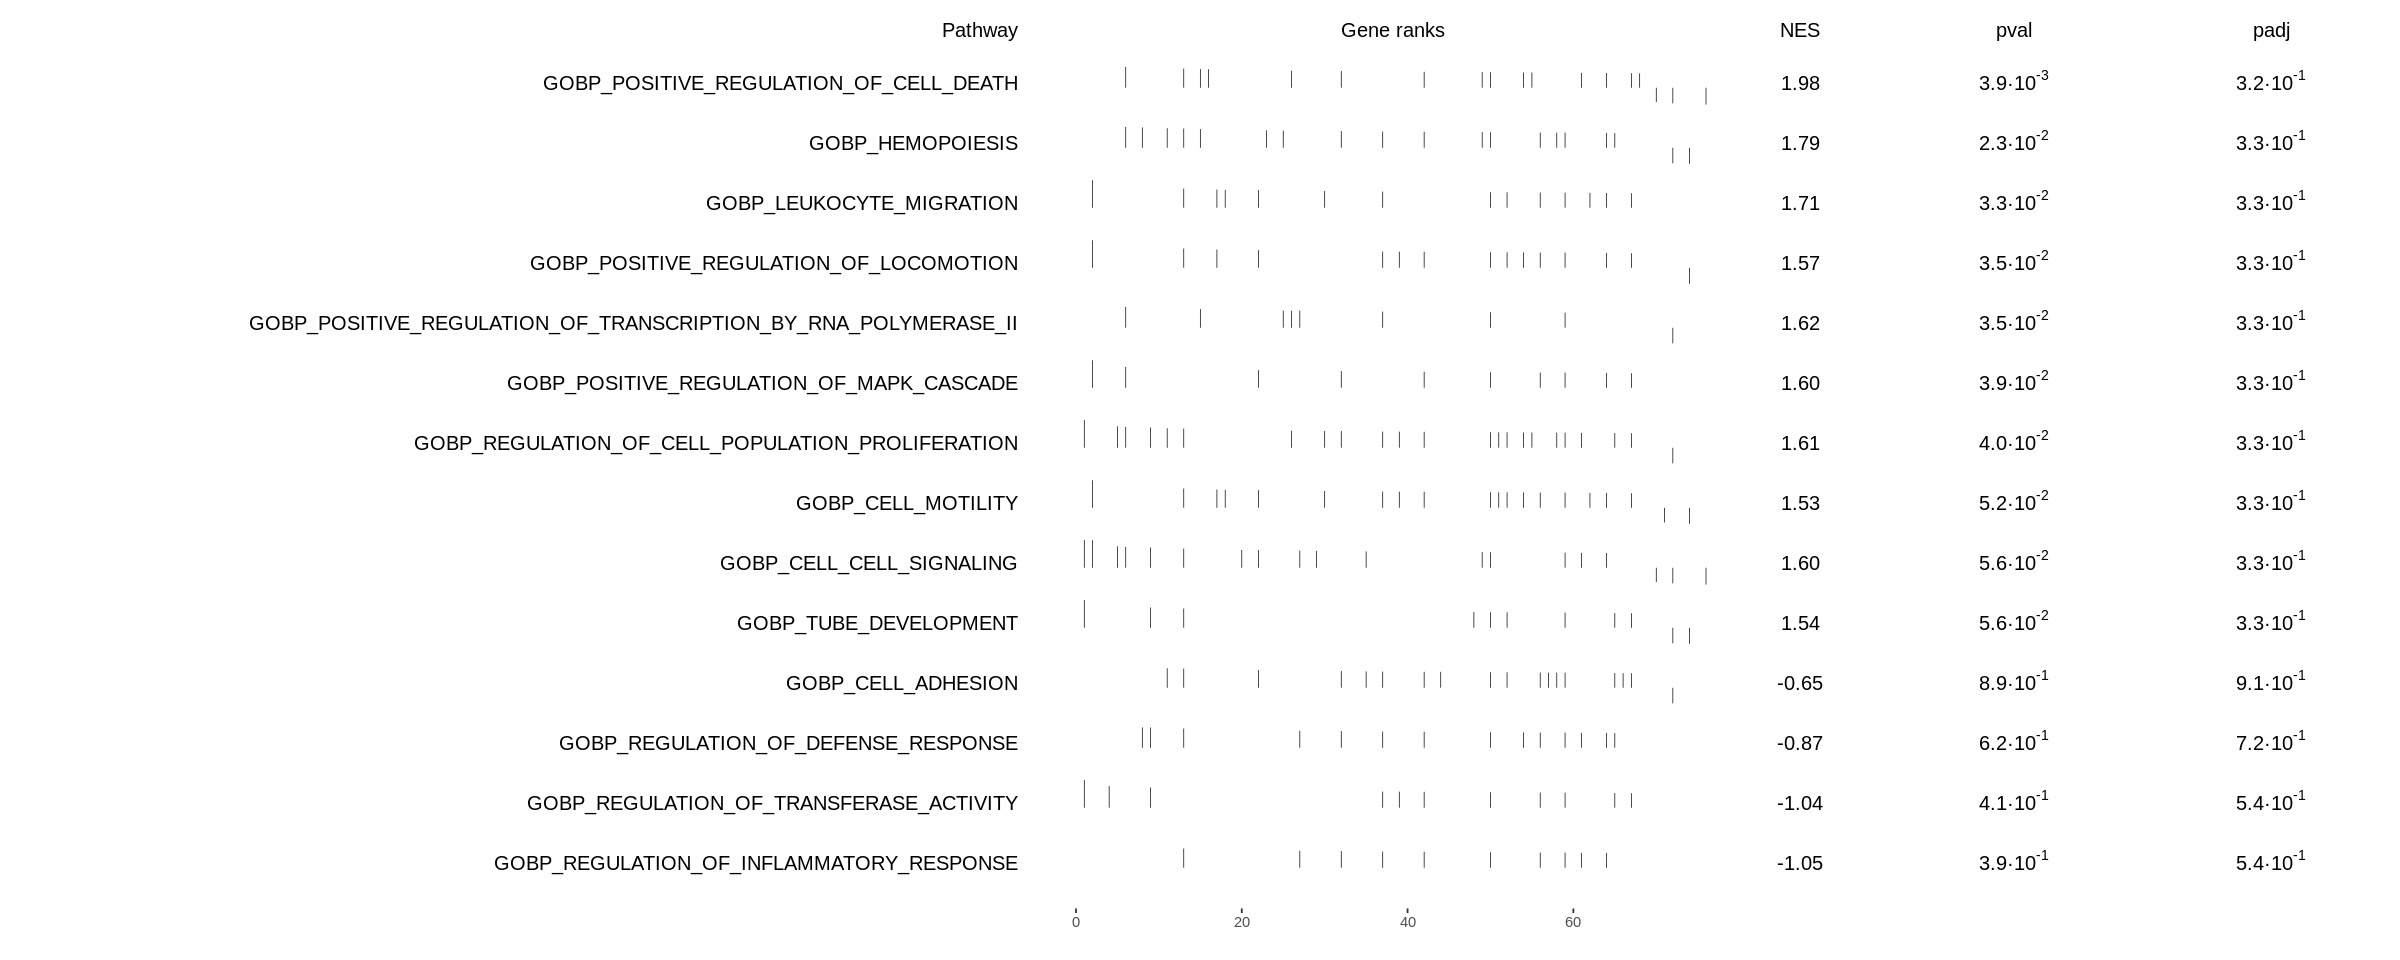

In [123]:
plotGseaTable(GO[topGOPathways], fold_changes, GO_Macrophage_Cluster0, 
              gseaParam=0.5)

In [128]:
KEGG_Macrophage_Cluster0 <- fgsea(pathways = KEGG,stats = fold_changes_0, eps = 0.0, minSize = 5, maxSize = 500)  

In [129]:
head(KEGG_Macrophage_Cluster0[order(pval), ])


pathway                                     pval        padj       log2err  
1 KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION 0.006004701 0.05234732 0.4070179
2 KEGG_PATHWAYS_IN_CANCER                     0.010469463 0.05234732 0.3807304
3 KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY   0.044728435 0.13074485 0.2712886
4 KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY    0.052297940 0.13074485 0.2489111
5 KEGG_CHEMOKINE_SIGNALING_PATHWAY            0.065607584 0.13121517 0.2878051
6 KEGG_LEISHMANIA_INFECTION                   0.170731707 0.28455285 0.1335550
  ES        NES      size leadingEdge                       
1 0.5651481 1.880713 12   CCL20, IL6  , INHBA, CCL2 , CXCL1 
2 0.7350884 1.780326  5   IL6  , PTGS2, FOS  , JUN          
3 0.5600313 1.525317  7   IL6 , FOS , JUN , CD14, TNF , CCL5
4 0.5934530 1.538595  6   IL6  , CCL2 , CXCL1, TNF  , CCL5  
5 0.6189222 1.604627  6   CCL20, CCL2 , CXCL1               
6 0.5352667 1.296374  5   PTGS2, FOS  , JUN  , TNF

In [130]:
topKEGGPathwaysUp <- KEGG_Macrophage_Cluster0[ES > 0][head(order(pval), n=10), pathway]
topKEGGPathwaysDown <- KEGG_Macrophage_Cluster0[ES < 0][head(order(pval), n=10),pathway]
topKEGGPathways <- c(topKEGGPathwaysUp, rev(topKEGGPathwaysDown))

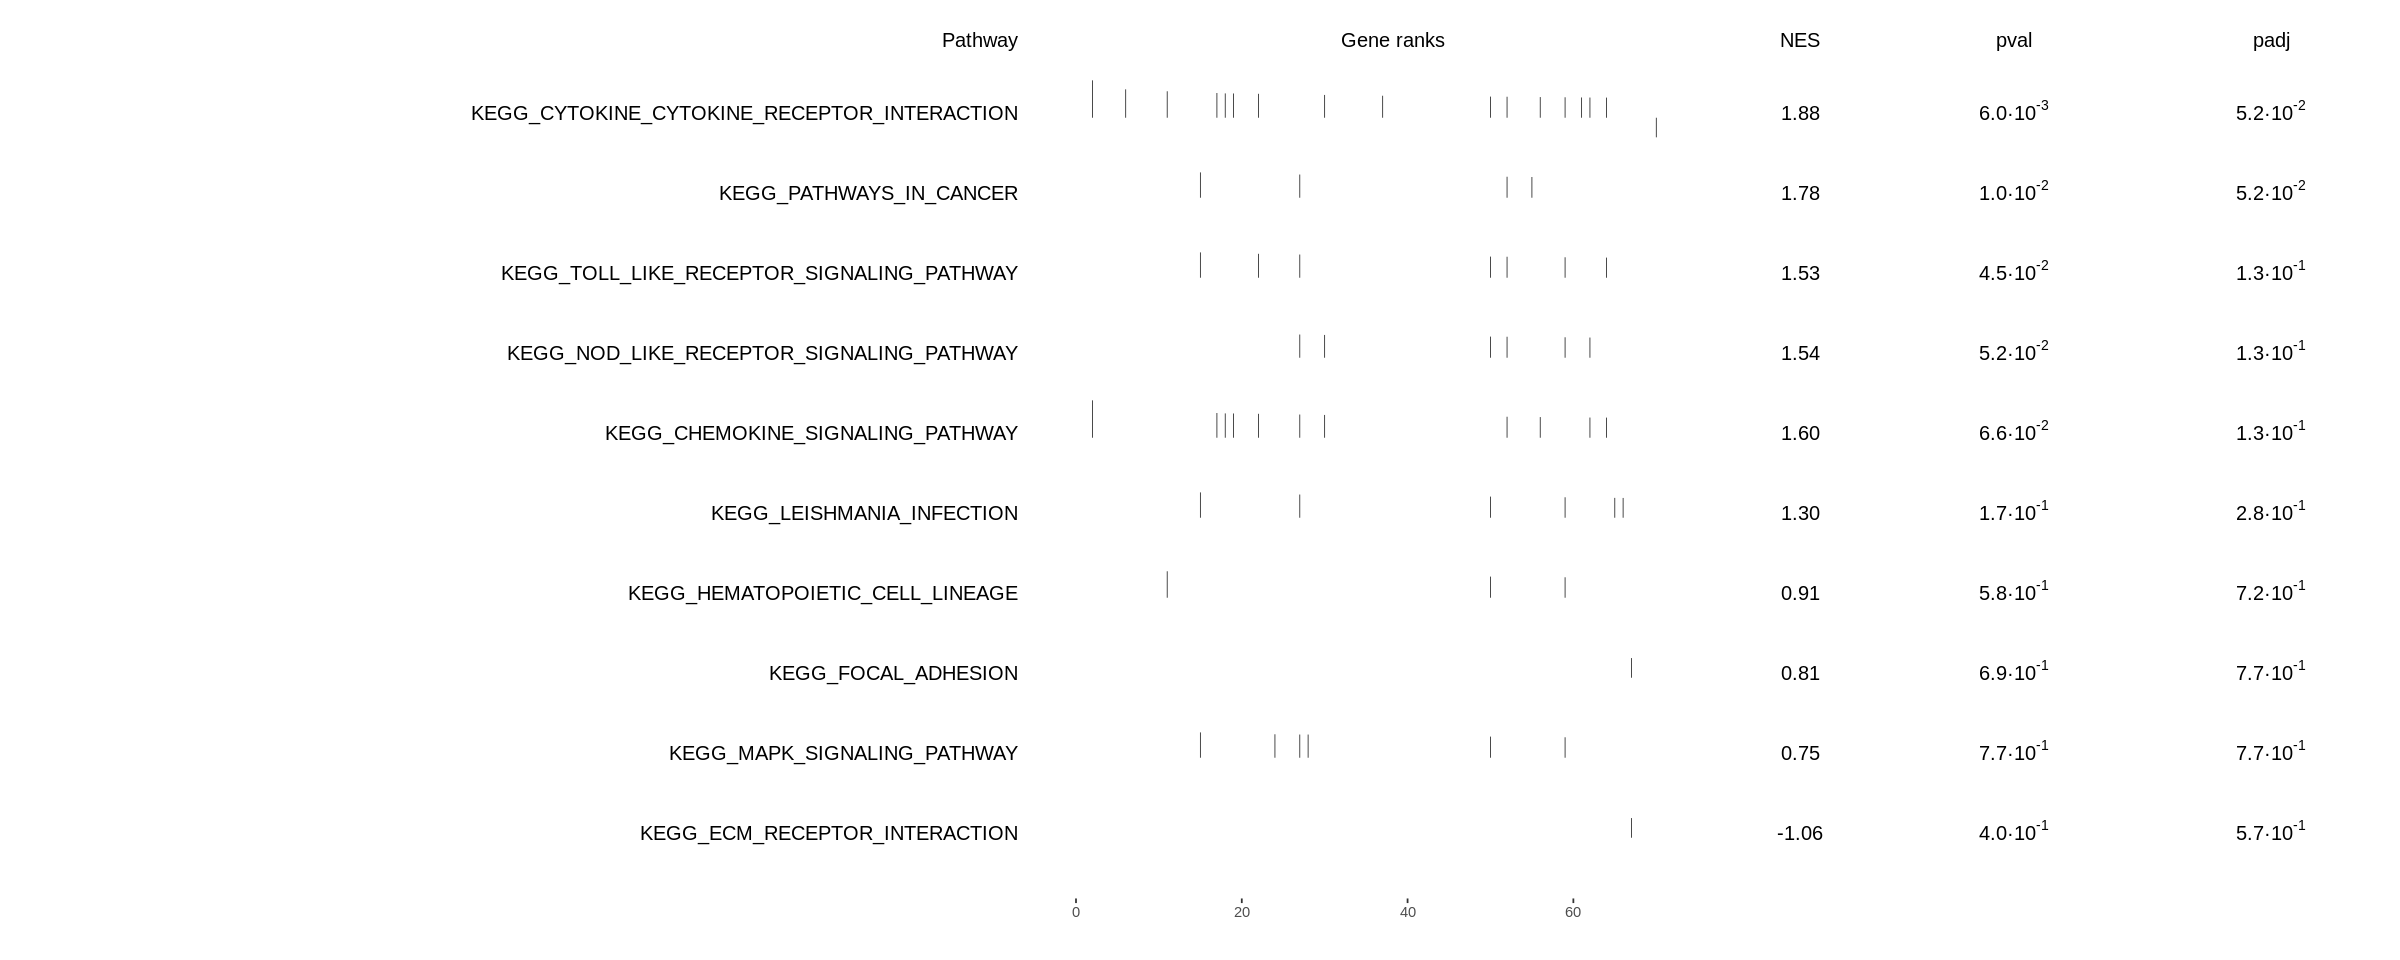

In [132]:
plotGseaTable(KEGG[topKEGGPathways], fold_changes, KEGG_Macrophage_Cluster0, 
              gseaParam=0.5)

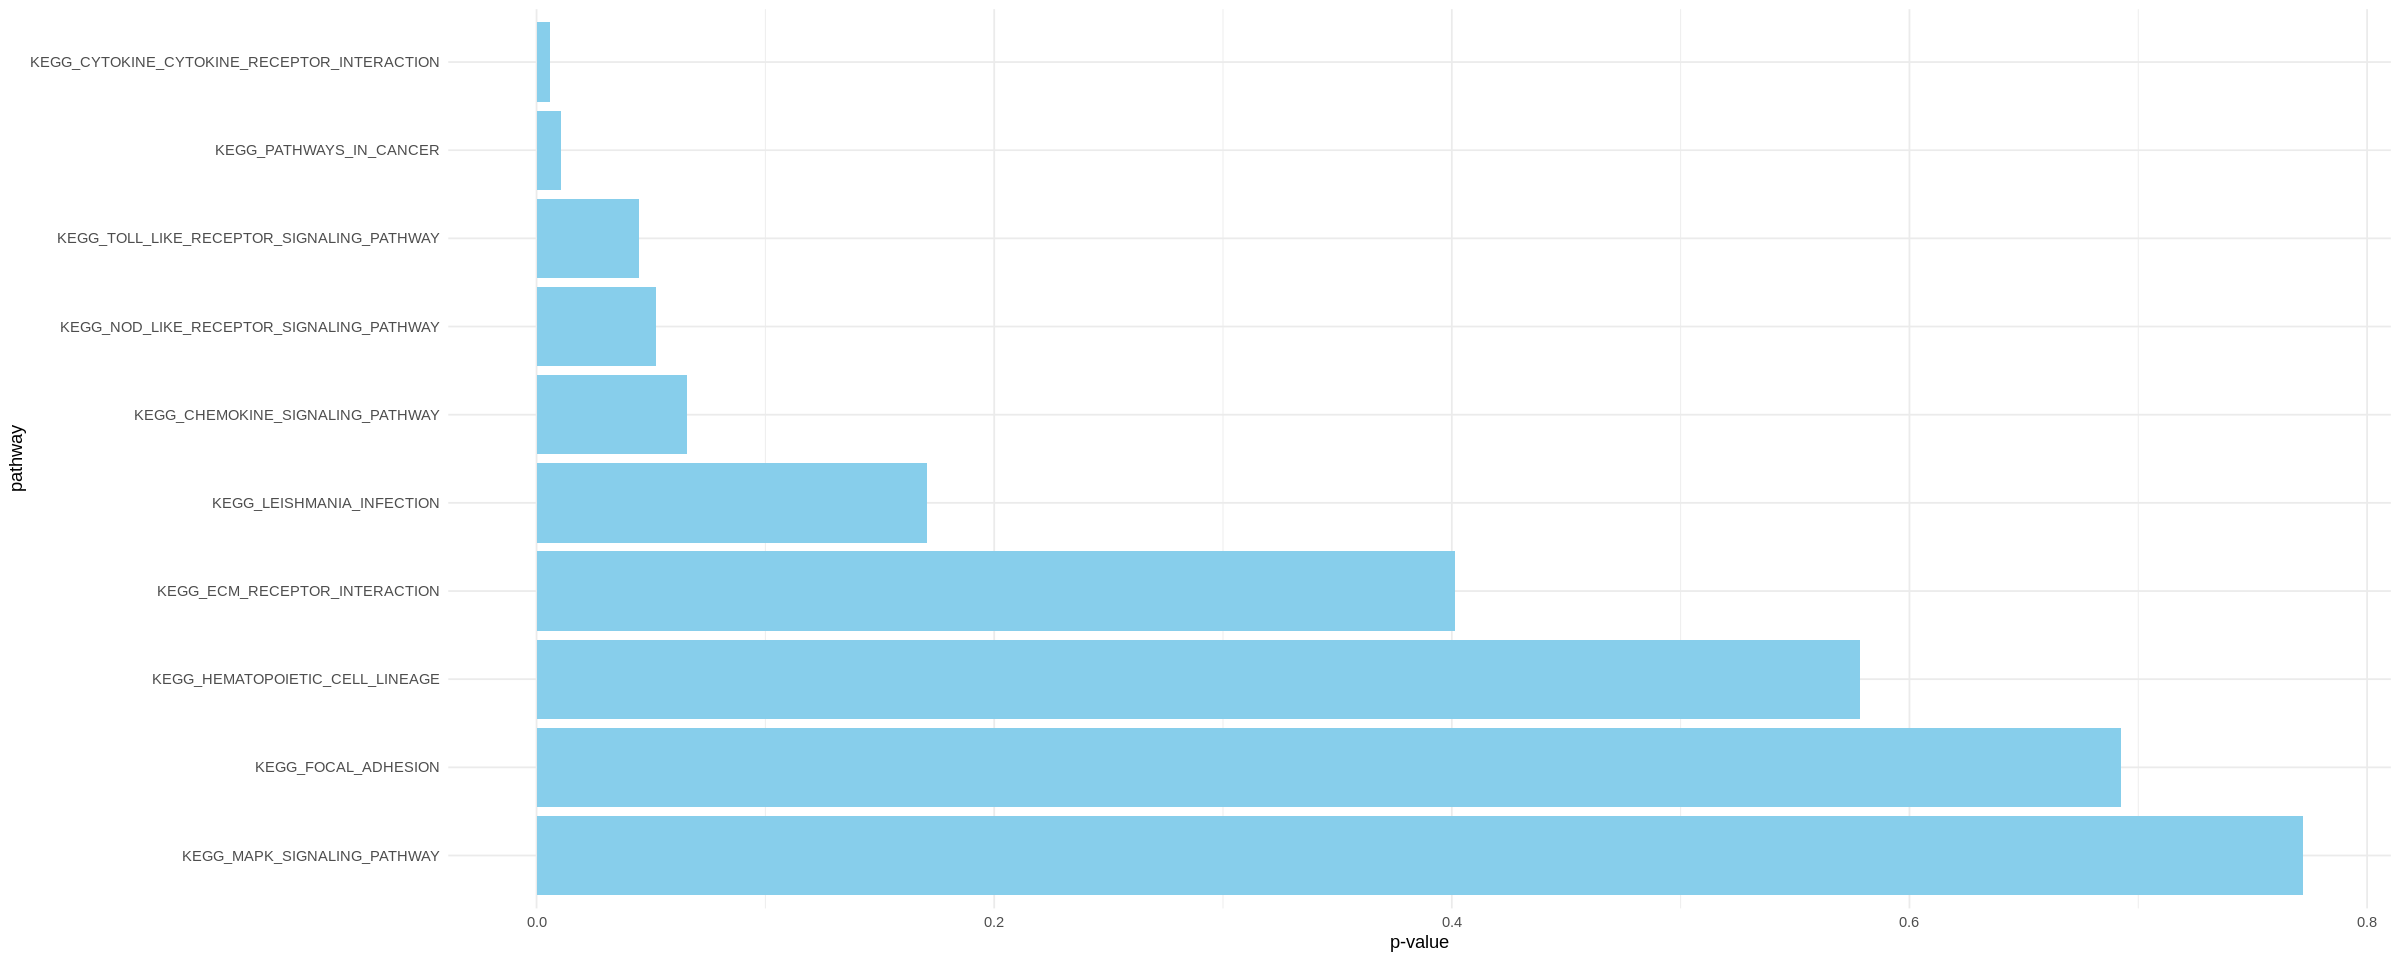

In [133]:
top_10_data <- head(KEGG_Macrophage_Cluster0, 10)
# Create a basic bar plot of 'GO pathway' vs 'pval'
bar_plot <- ggplot(top_10_data, aes(x = reorder(`pathway`, -pval), y = pval)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # Rotate the x-axis labels for better readability
  labs(x = "pathway", y = "p-value") +
  theme_minimal()  # Use a minimal theme for the plot

# Print the bar plot
print(bar_plot)

In [99]:
library(ggplot2)


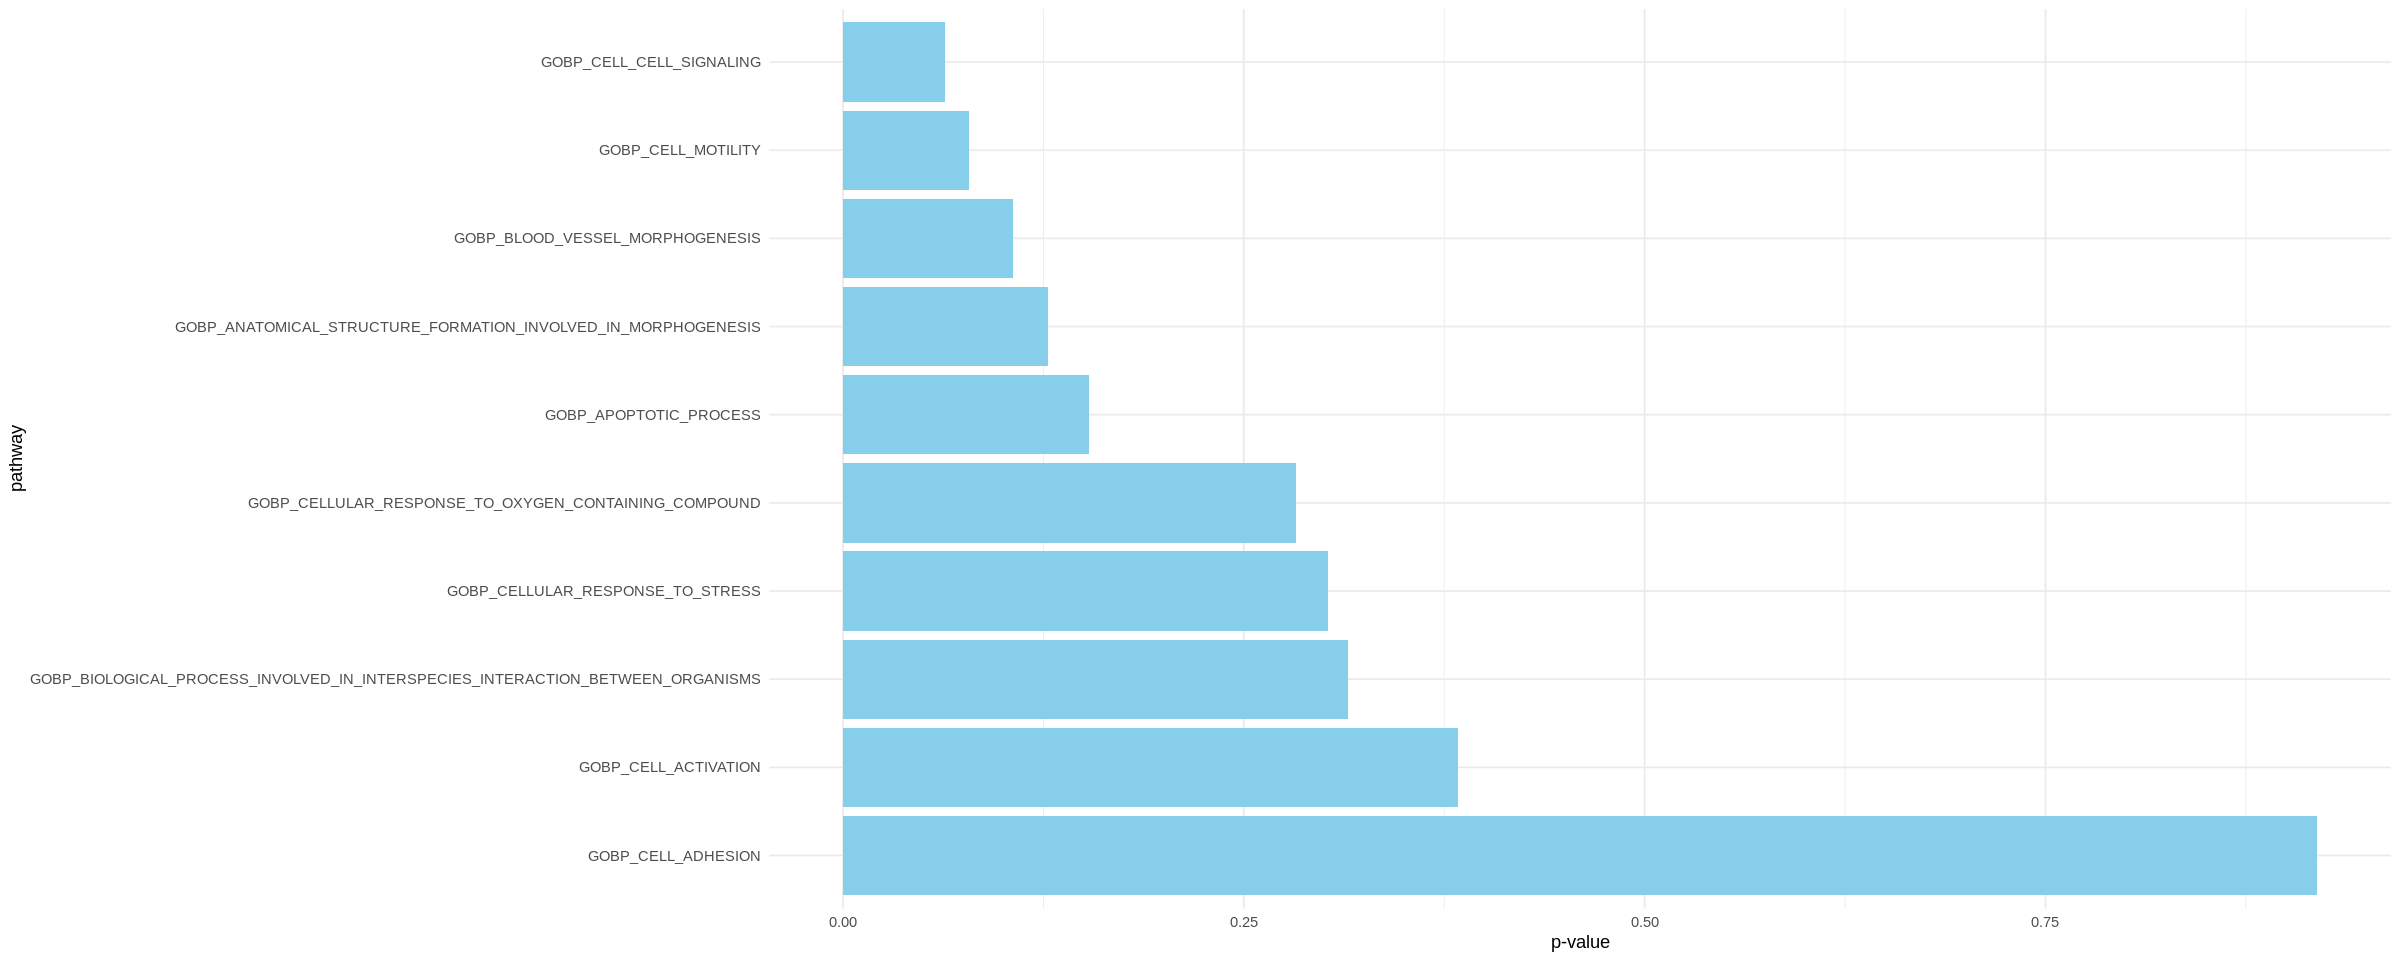

In [100]:
top_10_data <- head(GO_Macrophage_Cluster0, 10)
# Create a basic bar plot of 'GO pathway' vs 'pval'
bar_plot <- ggplot(top_10_data, aes(x = reorder(`pathway`, -pval), y = pval)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # Rotate the x-axis labels for better readability
  labs(x = "pathway", y = "p-value") +
  theme_minimal()  # Use a minimal theme for the plot

# Print the bar plot
print(bar_plot)

In [101]:
Macrophage_Cluster4_DEGs$gene <- rownames(Macrophage_Cluster4_DEGs)
fold_changes<- Macrophage_Cluster4_DEGs$avg_log2FC
names(fold_changes) <- Macrophage_Cluster4_DEGs $gene

In [102]:
GO_Macrophage_Cluster4 <- fgsea(pathways = GO,stats = fold_changes, eps = 0.0, minSize = 15, maxSize = 500)  

In [103]:
head(GO_Macrophage_Cluster4[order(pval), ])


pathway                                         pval        padj     
1 GOBP_CELL_ACTIVATION                            0.007090629 0.4793767
2 GOBP_HOMEOSTATIC_PROCESS                        0.013696477 0.4793767
3 GOBP_REGULATION_OF_PROTEIN_MODIFICATION_PROCESS 0.026086644 0.6086884
4 GOBP_RESPONSE_TO_NITROGEN_COMPOUND              0.059796438 0.9395143
5 GOBP_T_CELL_ACTIVATION                          0.077412681 0.9395143
6 GOBP_POSITIVE_REGULATION_OF_CELL_COMMUNICATION  0.098522167 0.9395143
  log2err   ES         NES       size
1 0.4070179 -0.3684015 -1.925537 22  
2 0.3807304  0.4826079  1.806520 19  
3 0.3524879  0.4757428  1.681374 15  
4 0.2065879  0.4191815  1.541758 17  
5 0.2878051 -0.3250702 -1.491750 16  
6 0.1552420  0.3536354  1.447968 26  
  leadingEdge                                                                                                                                         
1 C1QA    , SEMA4A  , SOX4    , THBS1   , HLA-DQA1, PTPN6   , CCL3    , TNFRSF1B, IL1B    , RUNX3   , CCR7    , BID     , CLEC7A  , CXCL8   , TNF     
2 MT2A   , TXN    , INHBA  , ISG15  , IL7R   , HERPUD1, ANXA1  , ATP1B3 , G0S2                                                                        
3 AREG   , TXN    , INHBA  , ISG15  , EREG   , HERPUD1                                                                                                
4 AREG   , TXN    , INHBA  , EREG   , HERPUD1, ANXA1  , FOS                                                                                           
5 SEMA4A  , SOX4    , HLA-DQA1, PTPN6   , TNFRSF1B, IL1B    , RUNX3   , CCR7    , BID     , CLEC7A                                                    
6 AREG , CCL20, TXN  , S100B, INHBA, EREG , IL7R

In [104]:
topGOPathwaysUp <- GO_Macrophage_Cluster4[ES > 0][head(order(pval), n=10), pathway]
topGOPathwaysDown <- GO_Macrophage_Cluster4[ES < 0][head(order(pval), n=10),pathway]
topGOPathways <- c(topGOPathwaysUp, rev(topGOPathwaysDown))

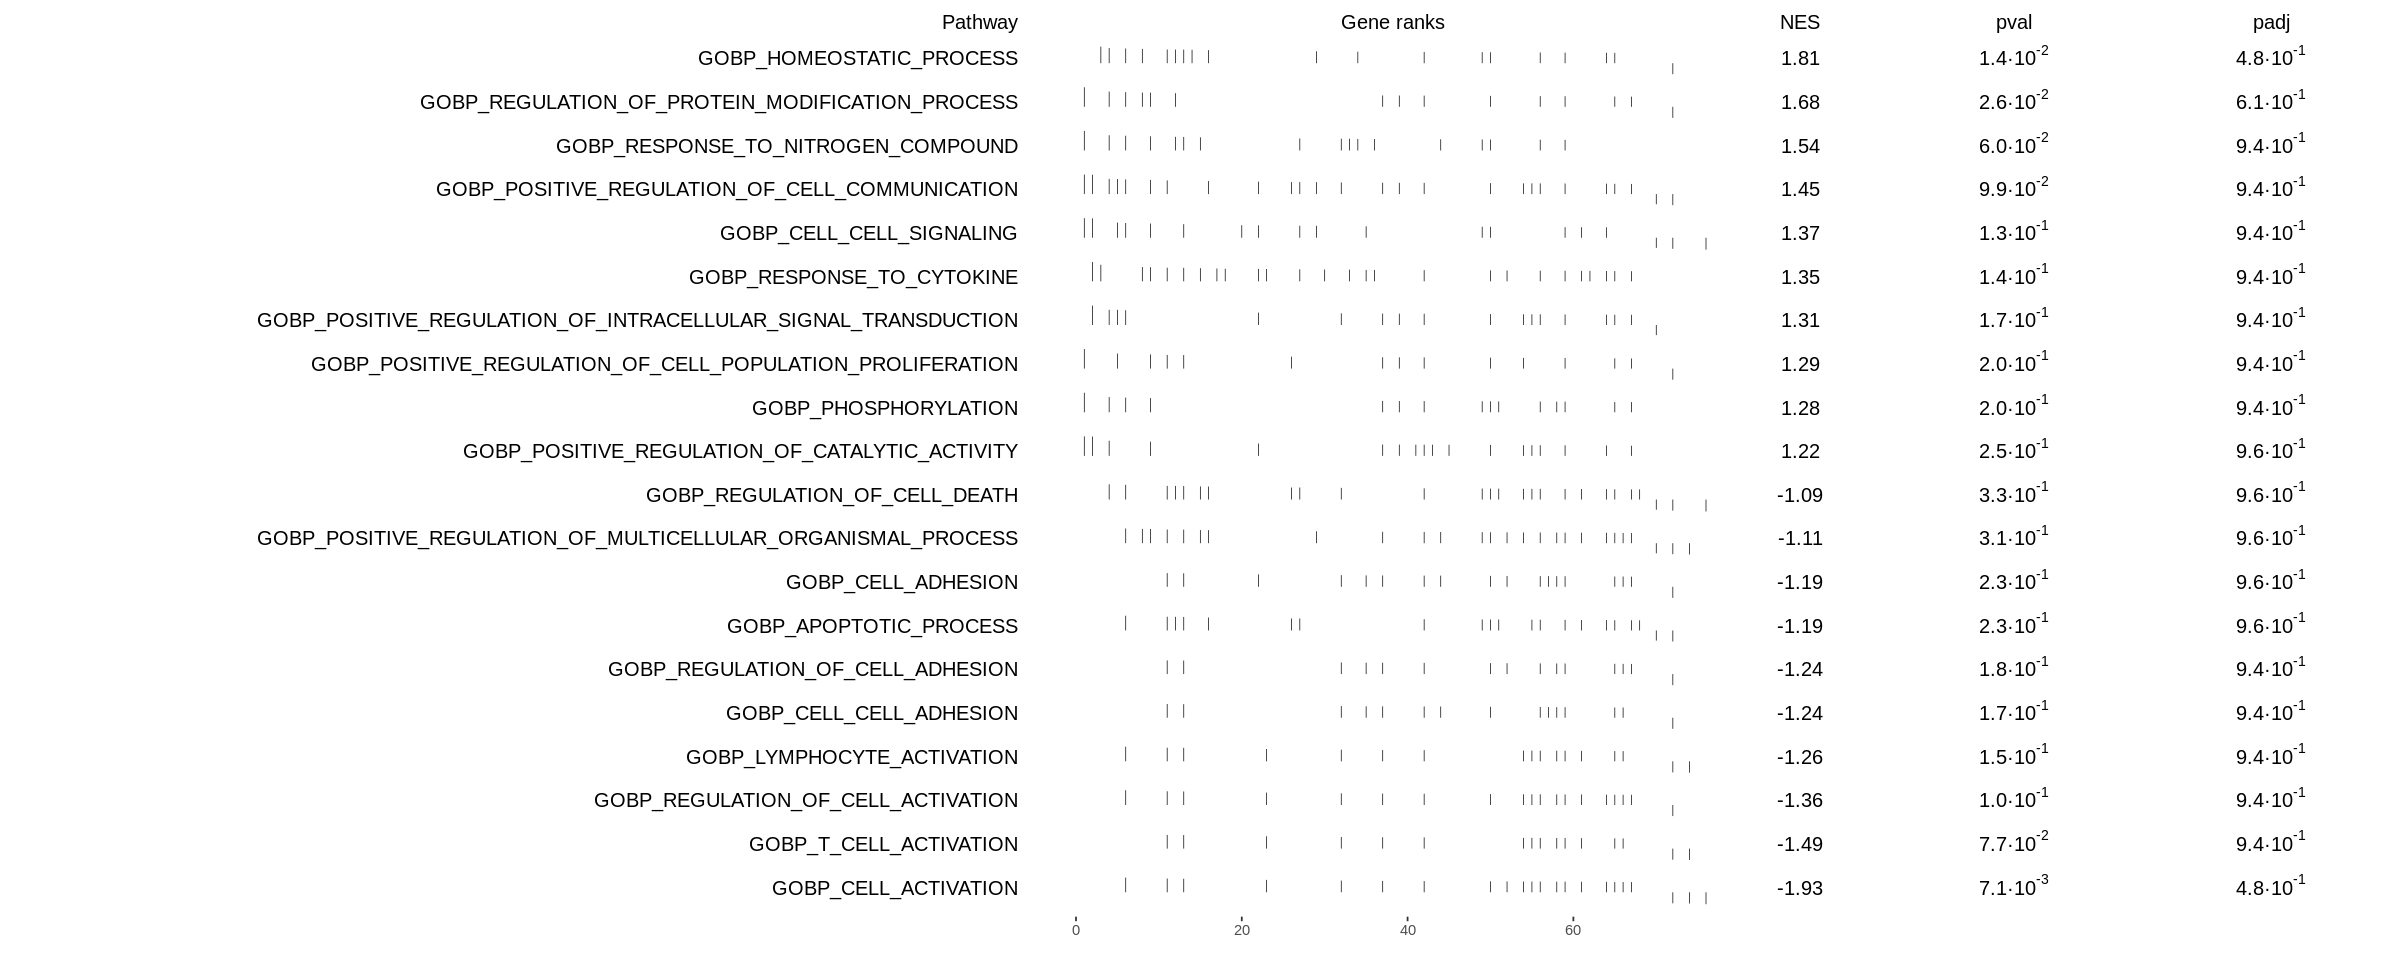

In [106]:
plotGseaTable(GO[topGOPathways], fold_changes, GO_Macrophage_Cluster4, 
              gseaParam=0.5)

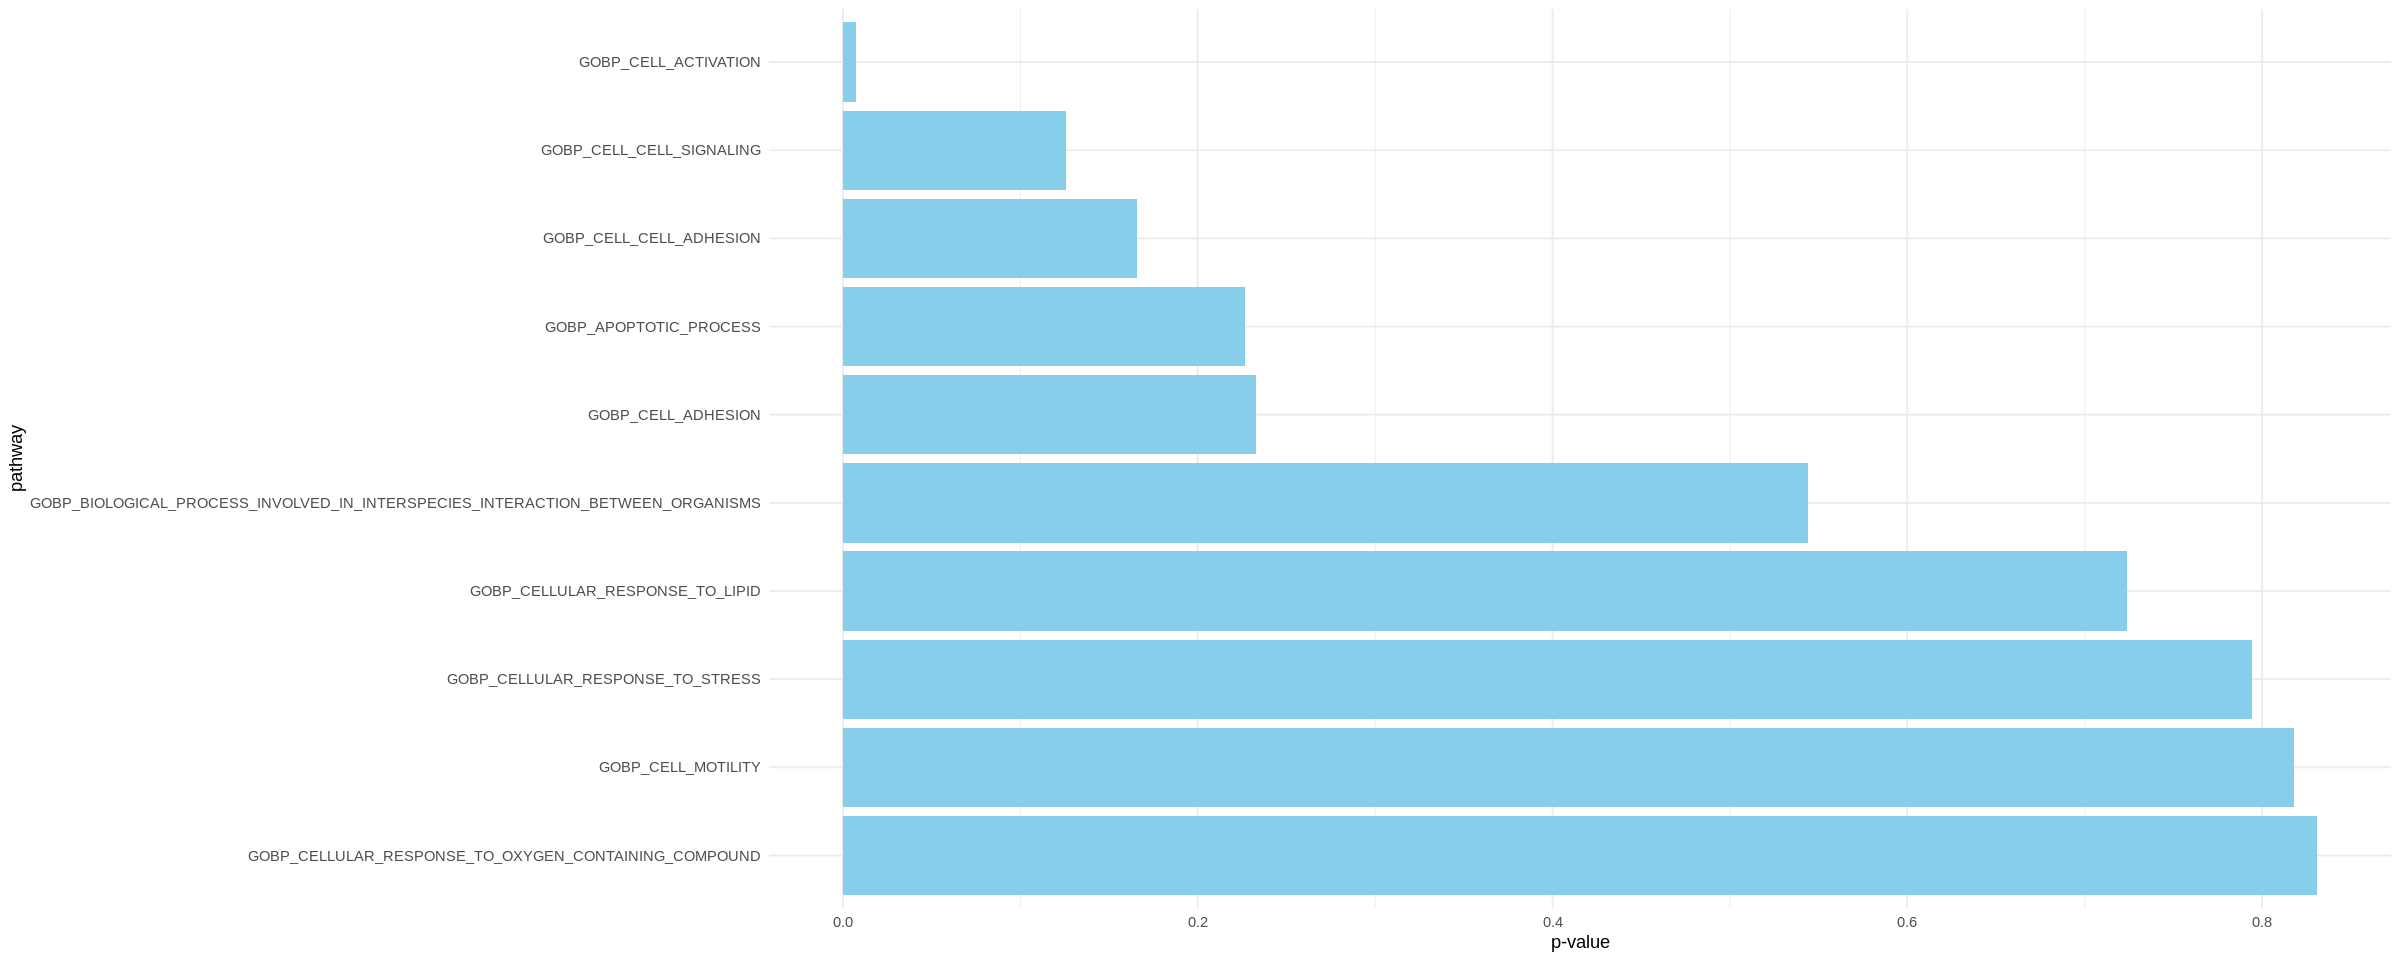

In [107]:
top_10_data <- head(GO_Macrophage_Cluster4, 10)
# Create a basic bar plot of 'GO pathway' vs 'pval'
bar_plot <- ggplot(top_10_data, aes(x = reorder(`pathway`, -pval), y = pval)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # Rotate the x-axis labels for better readability
  labs(x = "pathway", y = "p-value") +
  theme_minimal()  # Use a minimal theme for the plot

# Print the bar plot
print(bar_plot)

In [112]:
KEGG_Macrophage_Cluster4 <- fgsea(pathways = KEGG,stats = fold_changes, eps = 0.0, minSize = 5, maxSize = 500)  

In [113]:
head(KEGG_Macrophage_Cluster4[order(pval), ])

pathway                                     pval      padj      log2err   
1 KEGG_CHEMOKINE_SIGNALING_PATHWAY            0.2023968 0.8241431 0.10797236
2 KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY    0.3483483 0.8241431 0.12625399
3 KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION 0.3681529 0.8241431 0.07165274
4 KEGG_MAPK_SIGNALING_PATHWAY                 0.4709389 0.8241431 0.06720651
5 KEGG_LEISHMANIA_INFECTION                   0.7657658 0.9925150 0.07808923
6 KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY   0.9324759 0.9925150 0.07147863
  ES         NES        size
1  0.3930432  1.2678934 11  
2 -0.3661972 -1.0946188  6  
3  0.2981517  1.0835117 17  
4  0.3857502  0.9941183  6  
5 -0.2449246 -0.7321166  6  
6 -0.2000000 -0.6251849  7  
  leadingEdge                                           
1 CCL20 , CXCL16, CXCL3 , CCL4L2, CCL4  , NFKB1 , CXCL1 
2 CXCL2, IL1B , CXCL8, TNF  , CXCL1, NFKB1              
3 CCL20 , INHBA , IL7R  , CXCL16, CXCL3 , CCL4L2, CCL4  
4 FOS  , DUSP4, NFKB1, HSPA6                            
5 HLA-DQA1, PTPN6   , IL1B    , TNF                     
6 CCL3 , IL1B , CXCL8, TNF  , NFKB1, CCL4 , FOS

In [114]:
topKEGGPathwaysUp <- KEGG_Macrophage_Cluster4[ES > 0][head(order(pval), n=10), pathway]
topKEGGPathwaysDown <- KEGG_Macrophage_Cluster4[ES < 0][head(order(pval), n=10),pathway]
topKEGGPathways <- c(topKEGGPathwaysUp, rev(topKEGGPathwaysDown))

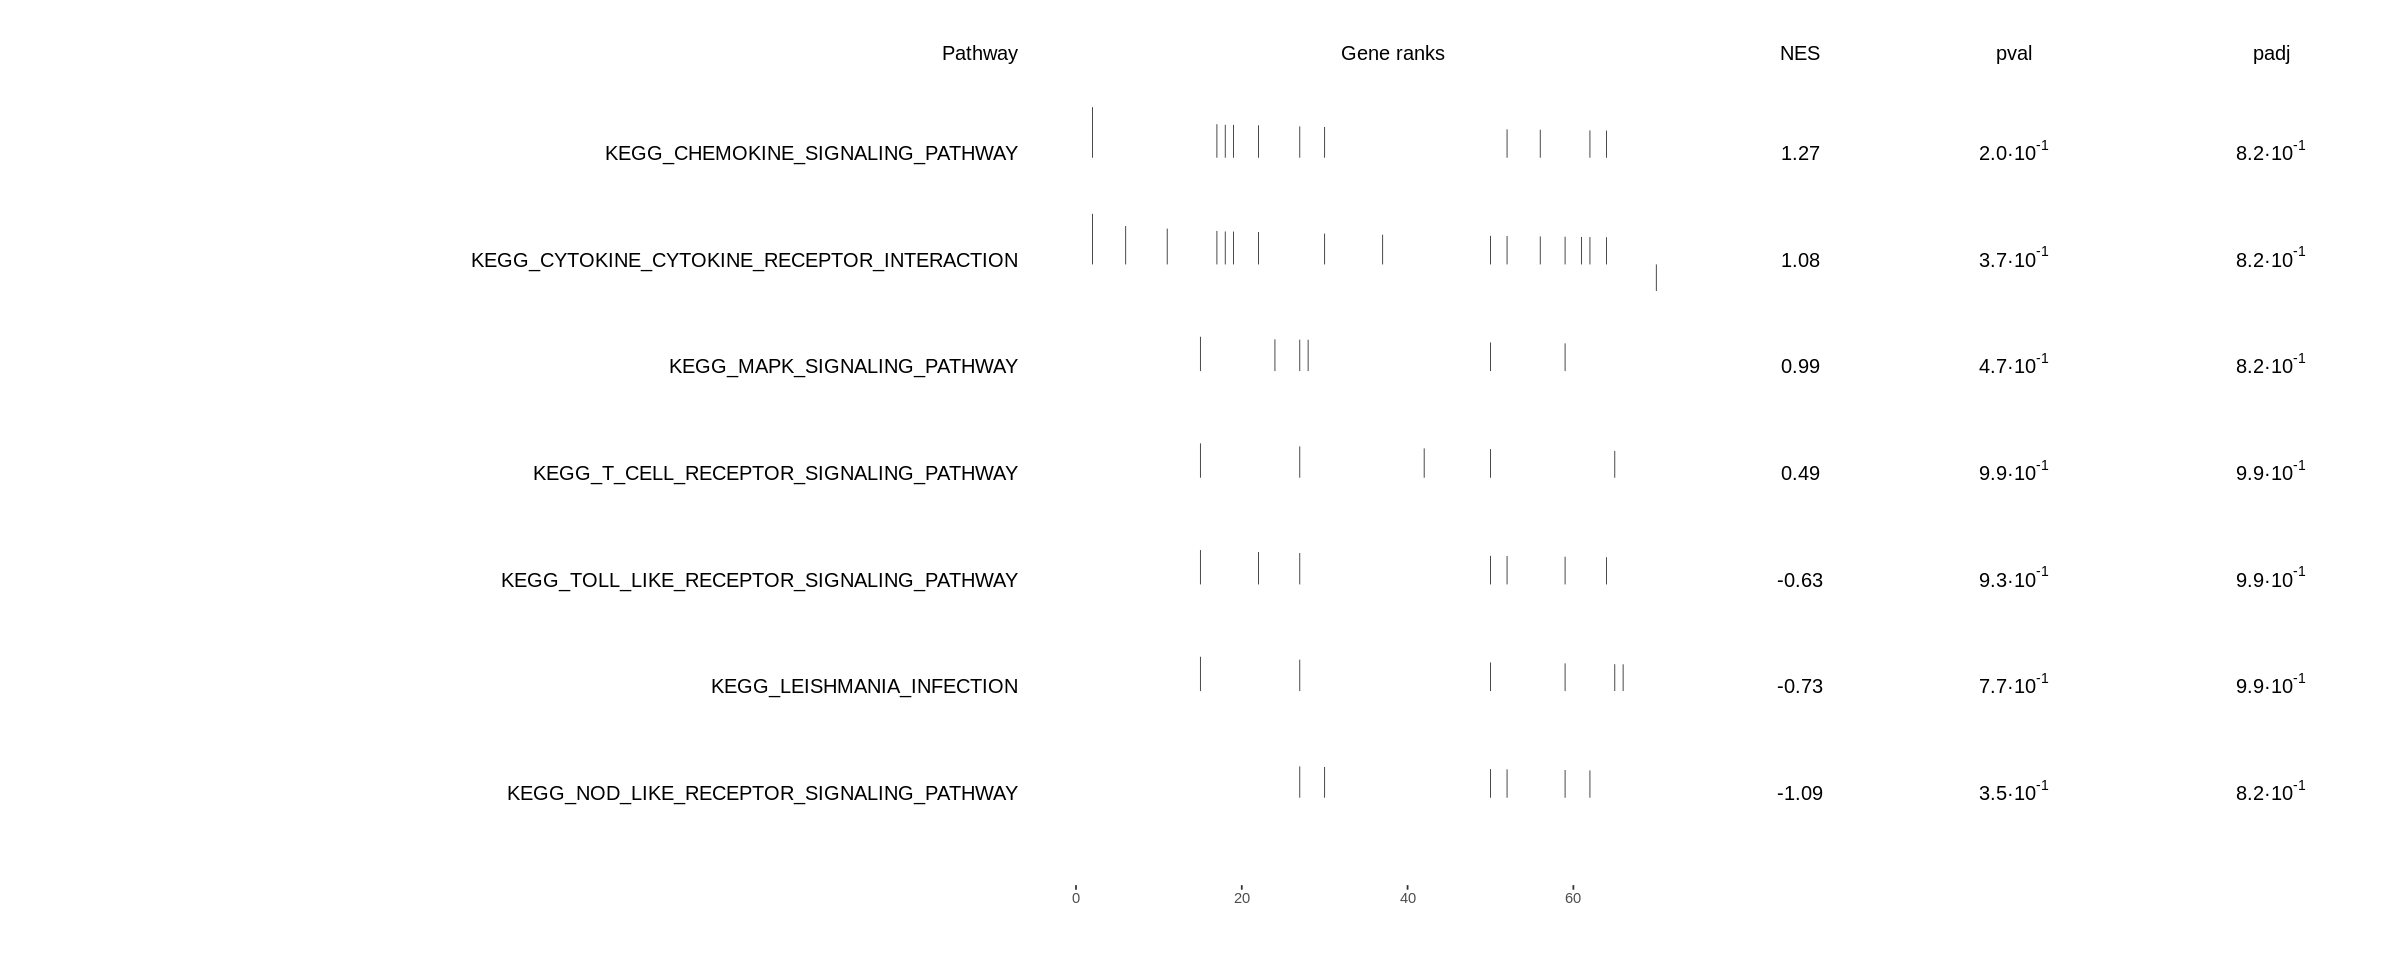

In [115]:
plotGseaTable(KEGG[topKEGGPathways], fold_changes, KEGG_Macrophage_Cluster4, 
              gseaParam=0.5)

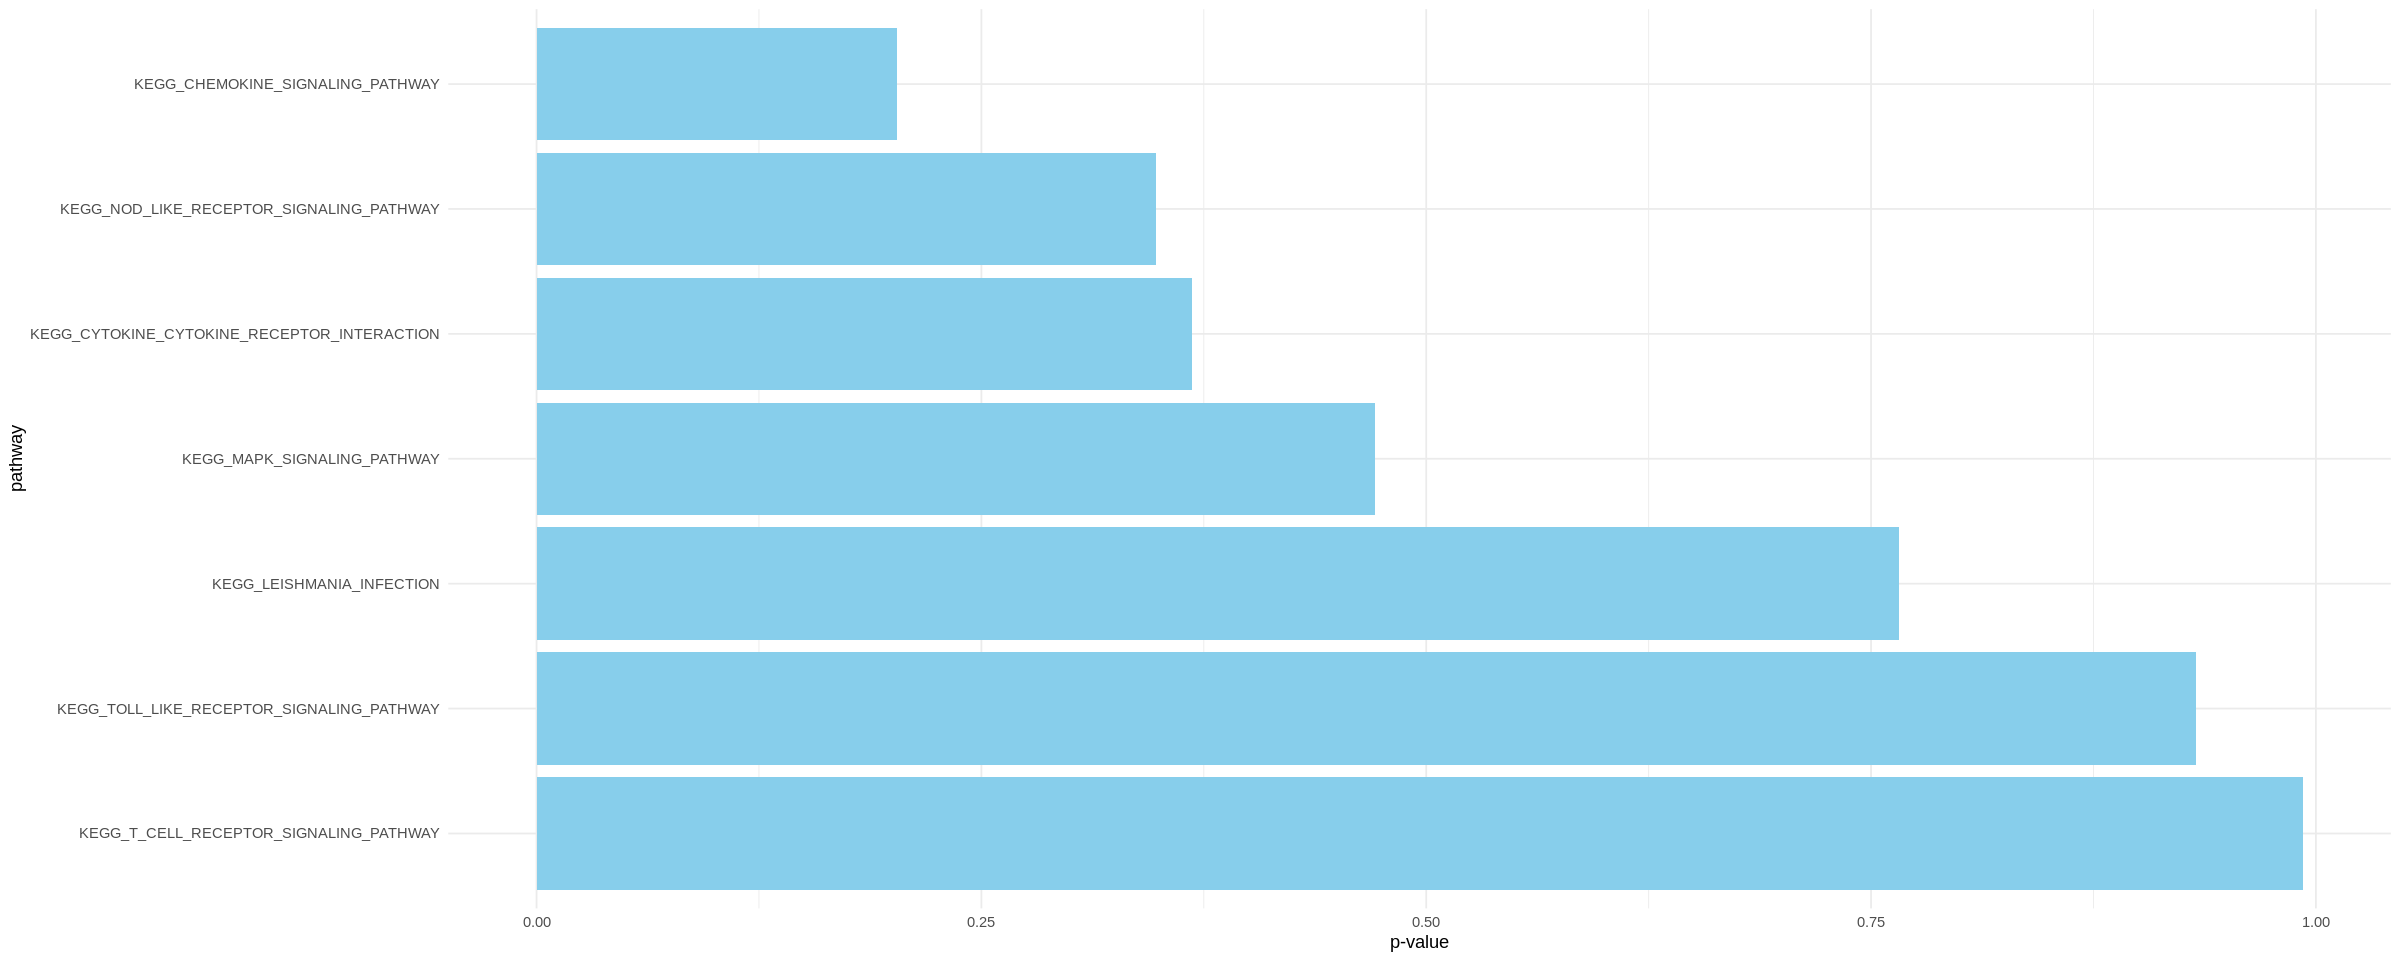

In [116]:
top_10_data <- head(KEGG_Macrophage_Cluster4, 10)
# Create a basic bar plot of 'GO pathway' vs 'pval'
bar_plot <- ggplot(top_10_data, aes(x = reorder(`pathway`, -pval), y = pval)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  coord_flip() +  # Rotate the x-axis labels for better readability
  labs(x = "pathway", y = "p-value") +
  theme_minimal()  # Use a minimal theme for the plot

# Print the bar plot
print(bar_plot)